# Avacado_Project :-  DataTrained   |   Evaluation_Project_2


#### Submitted by: Tamali Saha (tamali428@gmail.com)

## Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 
Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Import data from github and start the preprocessing steps:

In [47]:
# import data and check 6 different samples

data = pd.read_csv('avocado.csv')
data.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  04-02-2018          1.63      17074.83  2046.96  1529.20   
18245           8  28-01-2018          1.71      13888.04  1191.70  3431.50   
18246           9  21-01-2018          1.87      13766.76  1191.92  2452.79   
18247          10  14-01-2018          1.93      16205.22  1527.63  2981.04   
18248          11  07-01-2018          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [48]:
# checking shapes

data.shape

(18249, 14)

#### Observations:

This Dataset has 18249 rows and 14 columns. Let's study the column's names and their charectaristics.

In [49]:
# checking columns names

data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

#### Observation:
Here, 'Unnamed: 0' is not necessary.

So let's remove it  parmanently.

In [50]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [51]:
data.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1  20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2  13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3  06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4  29-11-2015          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [52]:
# checking shapes

data.shape

(18249, 13)

#### Observations:
Now the new dataset has 18249 rows and 13 columns.

But here Date is in dd-mm-yyyy format. Need to convert this in datetime format which is yyyy-mm-dd

### Date Datatype:

In [53]:
data['Date'].dtype

dtype('O')

In [54]:
data1= data.copy()

In [55]:
data[["day", "month", "year1"]] = data["Date"].str.split("-", expand = True)

In [56]:
data.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1  20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2  13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3  06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4  29-11-2015          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region day month year1  
0  Albany  27    12  2015  
1  Albany  20    12  2015  
2  Albany  13    12  2015  
3  Albany  06    12  2015  
4  Albany  29    11  2015

In [58]:
data.drop(['Date','year1'],axis=1, inplace= True)
data.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region day month  
0     8603.62       93.25          0.0  conventional  2015  Albany  27    12  
1     9408.07       97.49          0.0  conventional  2015  Albany  20    12  
2     8042.21      103.14          0.0  conventional  2015  Albany  13    12  
3     5677.40      133.76          0.0  conventional  2015  Albany  06    12  
4     5986.26      197.69          0.0  conventional  2015  Albany  29    11

#### Observations:

Date is converted into day month and year column

In [60]:
# Checking column name
data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'day', 'month'],
      dtype='object')

In [61]:
# renaming column

data.columns= ['AveragePrice', 'Total_Volume', 'd4046', 'd4225', 'd4770',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type', 'year',
       'region','day', 'month']
data.head()

AveragePrice  Total_Volume    d4046      d4225   d4770  Total_Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small_Bags  Large_Bags  XLarge_Bags          type  year  region day month  
0     8603.62       93.25          0.0  conventional  2015  Albany  27    12  
1     9408.07       97.49          0.0  conventional  2015  Albany  20    12  
2     8042.21      103.14          0.0  conventional  2015  Albany  13    12  
3     5677.40      133.76          0.0  conventional  2015  Albany  06    12  
4     5986.26      197.69          0.0  conventional  2015  Albany  29    11

### Checking Null:

In [62]:
#checking null values

null_val= data.isna().sum()

In [63]:
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l , axis =1, keys =['Null Values', 'Null Values percentage']))

missing value details 

               Null Values  Null Values percentage
AveragePrice            0                     0.0
Total_Volume            0                     0.0
d4046                   0                     0.0
d4225                   0                     0.0
d4770                   0                     0.0
Total_Bags              0                     0.0
Small_Bags              0                     0.0
Large_Bags              0                     0.0
XLarge_Bags             0                     0.0
type                    0                     0.0
year                    0                     0.0
region                  0                     0.0
day                     0                     0.0
month                   0                     0.0


<AxesSubplot:>

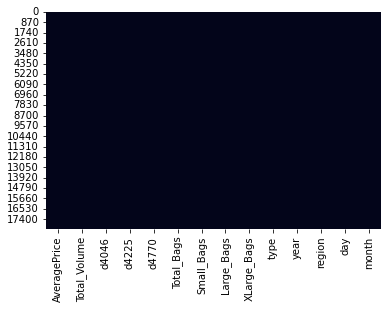

In [64]:
sns.heatmap(data.isnull(),cbar=False)

#### Observations: 

No null values are present in the total dataset.
### Checking duplicate:

In [65]:
#checking duplicate

data.duplicated().sum()

0

#### Observations:

No duplicate rows are present in the dataset.

### Checking different statistical parameter:

In [66]:
data.describe().round(2)

AveragePrice  Total_Volume        d4046        d4225       d4770  \
count      18249.00      18249.00     18249.00     18249.00    18249.00   
mean           1.41     850644.01    293008.42    295154.57    22839.74   
std            0.40    3453545.36   1264989.08   1204120.40   107464.07   
min            0.44         84.56         0.00         0.00        0.00   
25%            1.10      10838.58       854.07      3008.78        0.00   
50%            1.37     107376.76      8645.30     29061.02      184.99   
75%            1.66     432962.29    111020.20    150206.86     6243.42   
max            3.25   62505646.52  22743616.17  20470572.61  2546439.11   

        Total_Bags   Small_Bags  Large_Bags  XLarge_Bags      year  
count     18249.00     18249.00    18249.00     18249.00  18249.00  
mean     239639.20    182194.69    54338.09      3106.43   2016.15  
std      986242.40    746178.51   243965.96     17692.89      0.94  
min           0.00         0.00        0.00         0.00   2015.00  
25%        5088.64      2849.42      127.47         0.00   2015.00  
50%       39743.83     26362.82     2647.71         0.00   2016.00  
75%      110783.37     83337.67    22029.25       132.50   2017.00  
max    19373134.37  13384586.80  5719096.61    551693.65   2018.00

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   d4046         18249 non-null  float64
 3   d4225         18249 non-null  float64
 4   d4770         18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge_Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  day           18249 non-null  object 
 13  month         18249 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 1.9+ MB


In [68]:
data.nunique()

AveragePrice      259
Total_Volume    18237
d4046           17702
d4225           18103
d4770           12071
Total_Bags      18097
Small_Bags      17321
Large_Bags      15082
XLarge_Bags      5588
type                2
year                4
region             54
day                31
month              12
dtype: int64

#### Observations:

1. No null values are present.
2. Target variable is 'AveragePrice' and it is a float64 datatype. So it is a Regression problem.
3. Seems outliers are present in the overall dataset because most of the features has a difference between 75% percentile and max value.
4. 'type', 'day','month' and 'region' are object datatype. type has 2 categories ,region has 54 categories, day and month has 31 and 12 categories respectively.
5. 'year' is int64 datatype and it also has 4 differet categories.
6. Other variable are float64 datatypes.
7. The minimum value of d4046, d4225, d4770, Total_Bags, Small_Bags, Large_Bags, XLarge_Bags features is 0.(Need to impute this with proper data)
8. Most of the column , the value of std is greater than mean. 
9. the new dataset have 14 columns.

### Exploration of Categorical data:- 

Checking different unique values for categorical features
#### 1. type:

In [69]:
data["type"]. unique()

array(['conventional', 'organic'], dtype=object)

In [70]:
data["type"]. value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

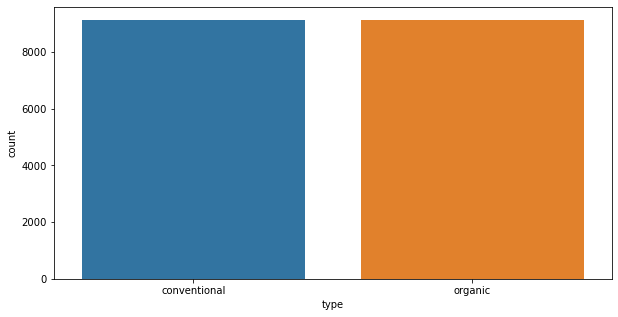

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(data['type'])
plt.show()

In [72]:
data.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

#### Observations:
type has two groups and the mean of target (AveragePrice) with respect to organic is greater than other.

#### 2. region:

In [73]:
data["region"]. unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [74]:
data["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

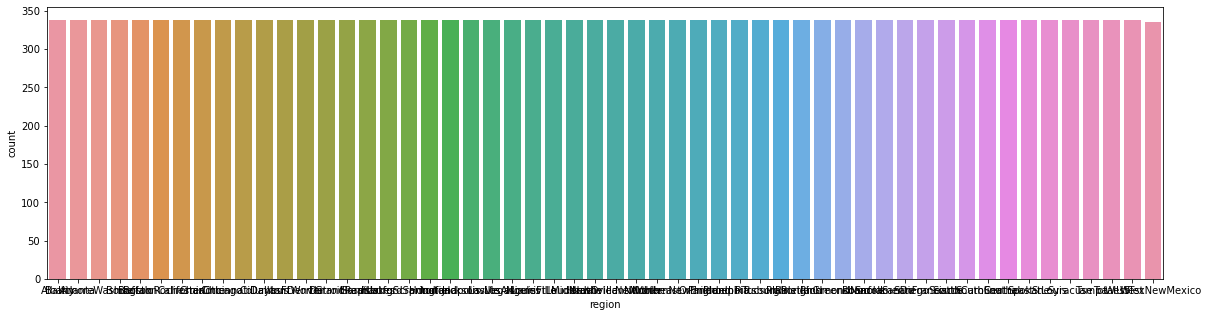

In [75]:
plt.figure(figsize=(20,5))
sns.countplot(data['region'])
plt.show()

#### Observations:
Here all 54 regions are same value counts. the dataset is not imbalanced with respect to region.

### Exploration of Numarical data:-
#### 1. For discrete datatype(year) :-

In [76]:
data["year"]. unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [77]:
data["year"]. value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

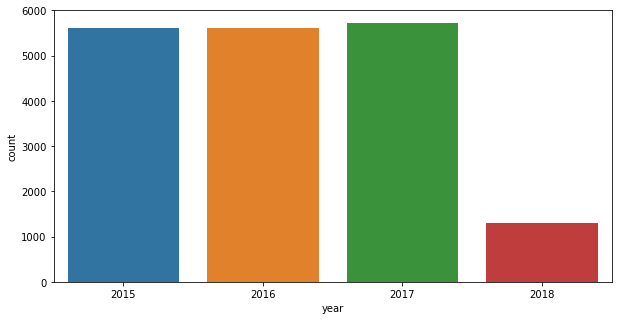

In [78]:
plt.figure(figsize=(10,5))
sns.countplot(data['year'])
plt.show()

In [79]:
data.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

#### Observations:
There are 4 different types of 'year'. 2018 has the lowest value count.

The mean of target (AveragePrice) with respect to year 2017 is greater than others.

### Exploration of day and months:-

In [86]:
data["day"]. value_counts().sort_index(ascending=True)

01    648
02    432
03    648
04    756
05    648
06    539
07    540
08    648
09    432
10    648
11    756
12    648
13    540
14    540
15    648
16    432
17    648
18    755
19    648
20    540
21    540
22    648
23    432
24    648
25    755
26    648
27    540
28    540
29    540
30    432
31    432
Name: day, dtype: int64

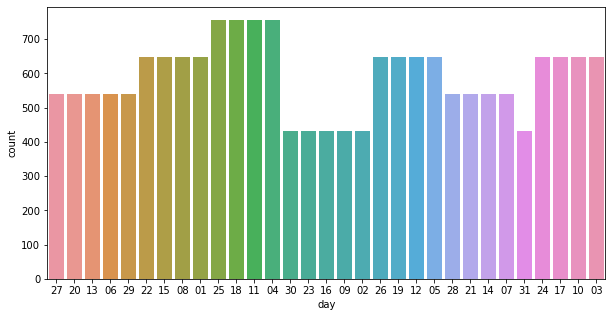

In [92]:
plt.figure(figsize=(10,5))
sns.countplot(data['day'])
plt.show()

In [93]:
data["month"]. value_counts().sort_index(ascending=True)

01    1944
02    1728
03    1836
04    1404
05    1512
06    1294
07    1512
08    1404
09    1296
10    1512
11    1404
12    1403
Name: month, dtype: int64

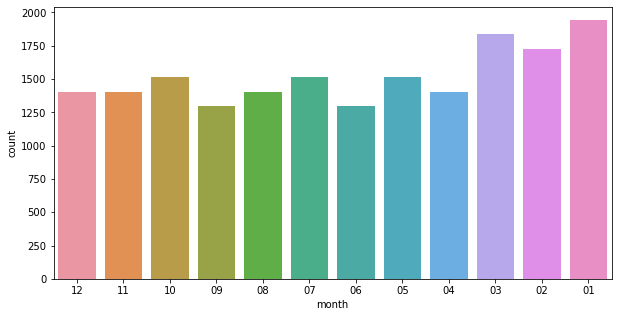

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(data['month'])
plt.show()

#### Observations:
1. day has 31 values and the count range is 400-600
2. month has 12 values and the count range is 1250-1750
3. The sale is high for 1st, 2nd and 3rd and comparively low for 8th, 9th and 6th months.

### Exploration of target variable:

In [96]:
data.AveragePrice.min()

0.44

In [97]:
data.AveragePrice.max()

3.25

In [98]:
data.AveragePrice.mean()

1.4059784097758825

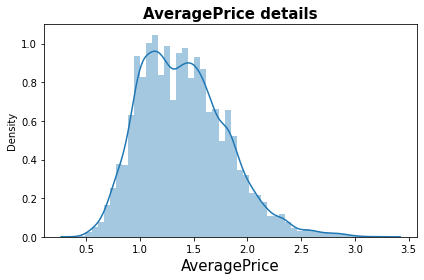

In [99]:
sns.distplot(data.AveragePrice)
plt. title('AveragePrice details',fontsize= 15, fontweight='bold')

plt. xlabel('AveragePrice', fontsize= 15)
plt.tight_layout()
plt.show()

#### Observations:

AveragePrice is target and it is a right skewed data.

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

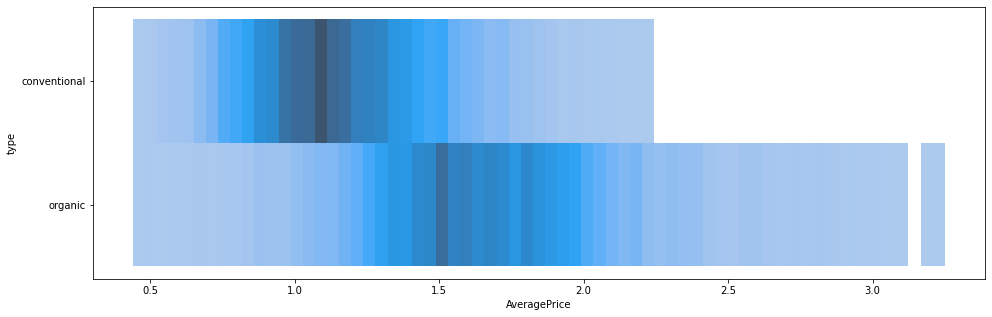

In [100]:
plt.figure(figsize=(16,5))
sns.histplot(y="type", x="AveragePrice", data=data)

#### Observations:
Outliers are present in both types of avocado. 


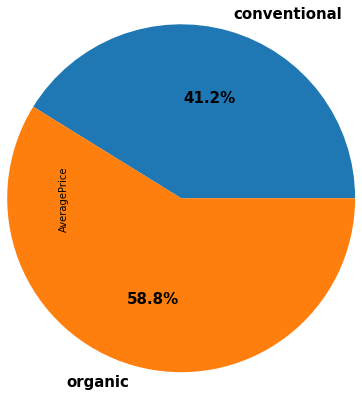

In [101]:
data.groupby('type')['AveragePrice'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

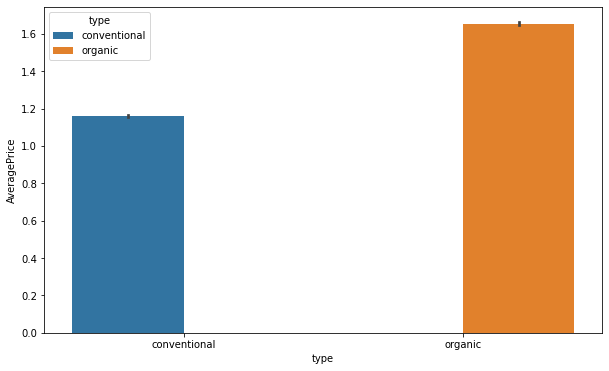

In [102]:
plt.figure(figsize=(10,6))
sns.barplot(x='type', y='AveragePrice', hue='type',data=data)
plt.show()

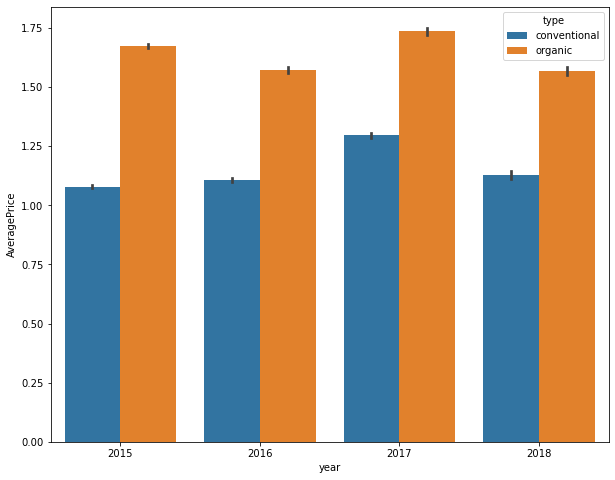

In [103]:
plt.figure(figsize=(10,8))
sns.barplot(x='year', y='AveragePrice', hue='type',data=data)
plt.show()

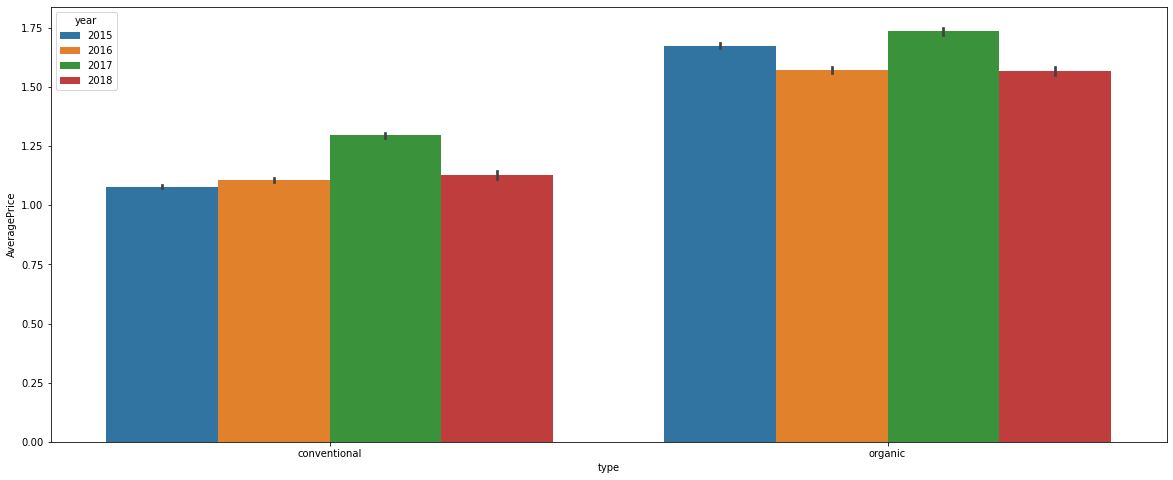

In [104]:
plt.figure(figsize=(20,8))
sns.barplot(x='type', y='AveragePrice', hue='year',data=data)
plt.show()

#### Observations:
AveragePrice of organic is greater than conventional in every year.

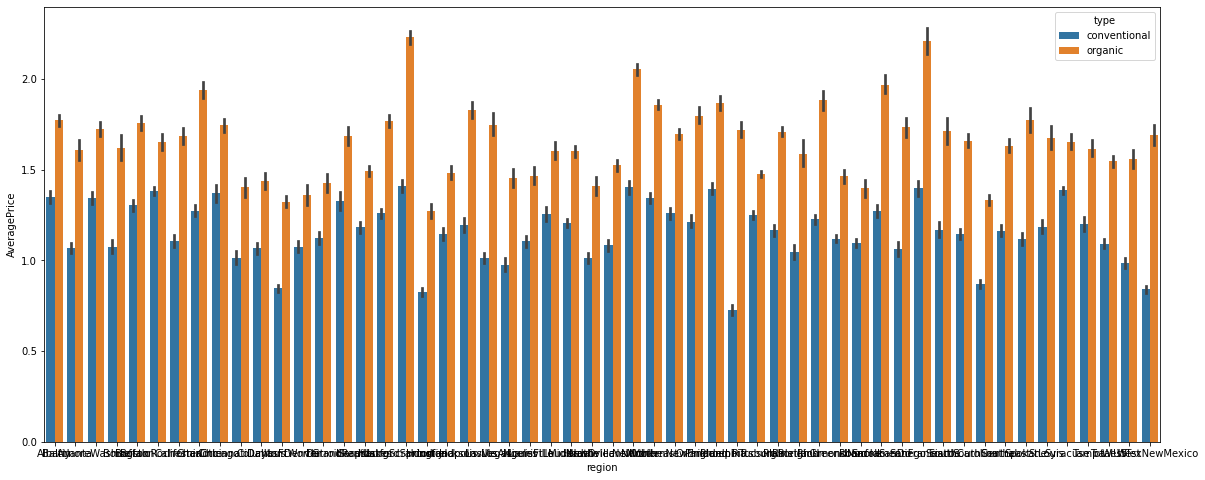

In [105]:
plt.figure(figsize=(20,8))
sns.barplot(x='region', y='AveragePrice', hue='type',data=data)
plt.show()

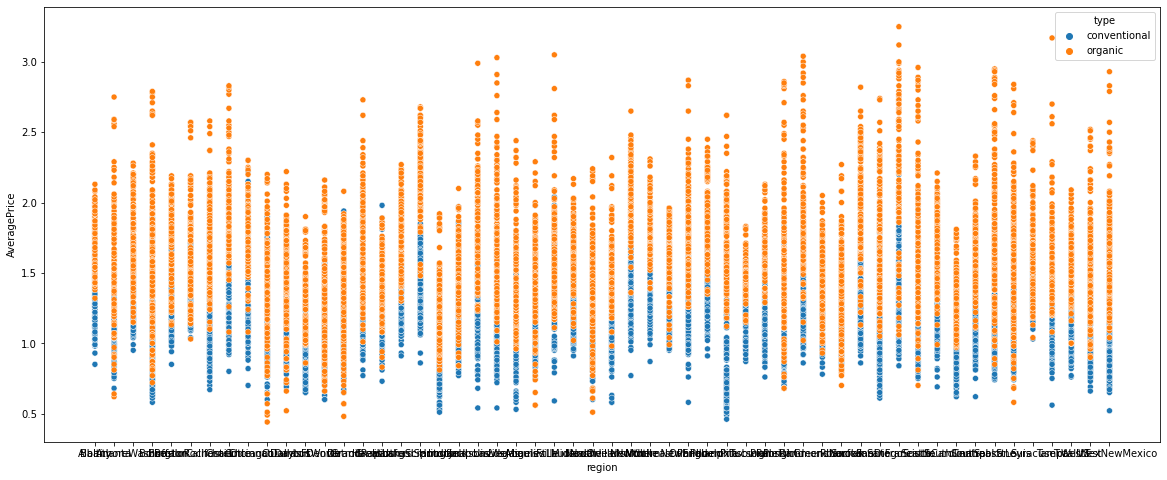

In [106]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='region', y='AveragePrice', hue='type',data=data)
plt.show()

<Figure size 1440x720 with 0 Axes>

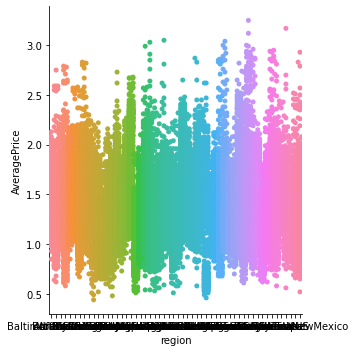

In [112]:
plt.figure(figsize=(20,10))
sns.catplot(x = "region", y = "AveragePrice", kind ='swarm', data=data)
plt.show()

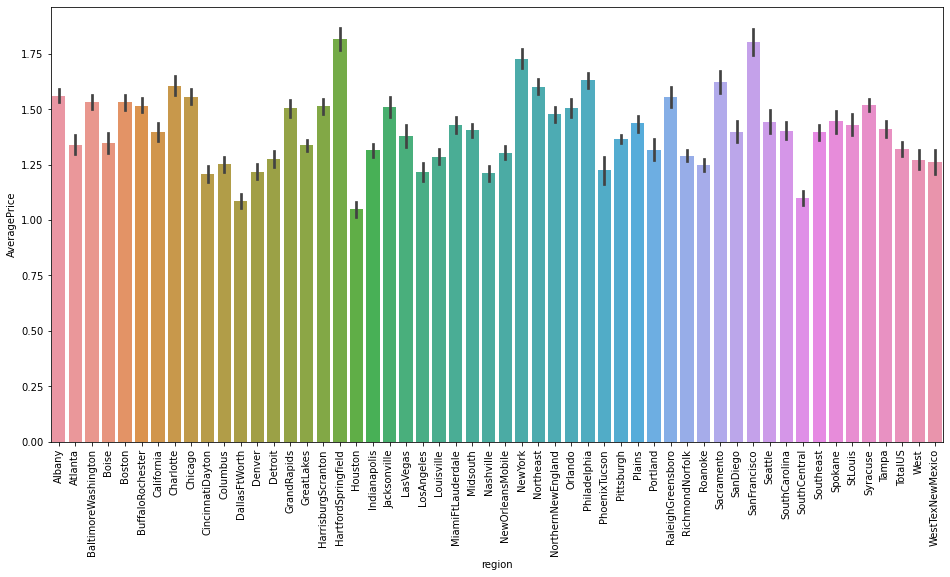

In [161]:
plt.figure(figsize=(16,8))
sns.barplot(x=data['region'],y=data['AveragePrice'], data=data)
plt.xticks(rotation=90)
plt.show()

#### Observations:
For every region the avg price of organic is greater than conventional

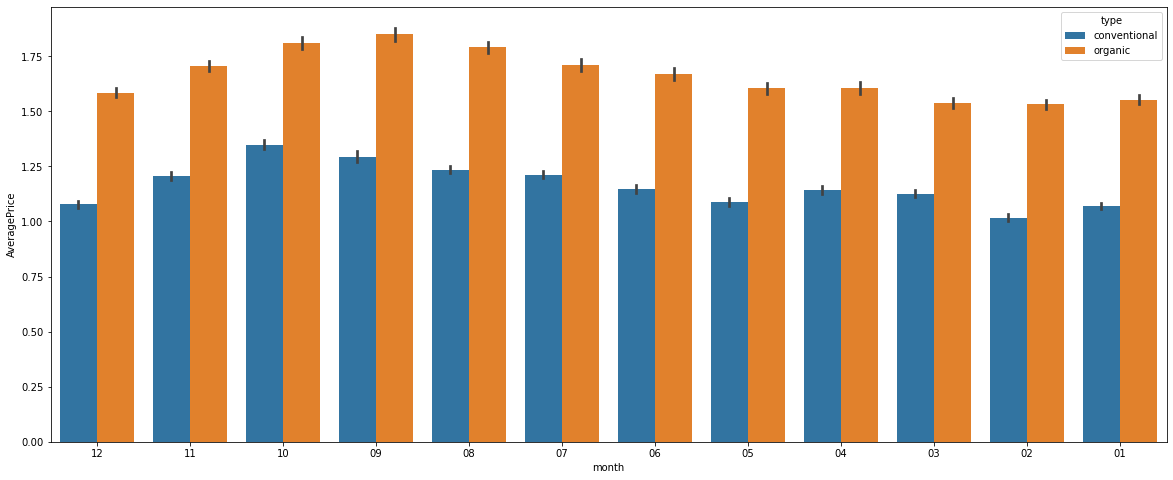

In [107]:
plt.figure(figsize=(20,8))
sns.barplot(x='month', y='AveragePrice', hue='type',data=data)
plt.show()

<Figure size 1440x720 with 0 Axes>

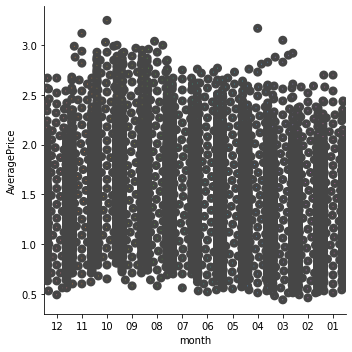

In [114]:
plt.figure(figsize=(20,10))
sns.catplot(x = "month", y = "AveragePrice", kind ='swarm', data=data, linewidth=4)
plt.show()

<Figure size 1440x720 with 0 Axes>

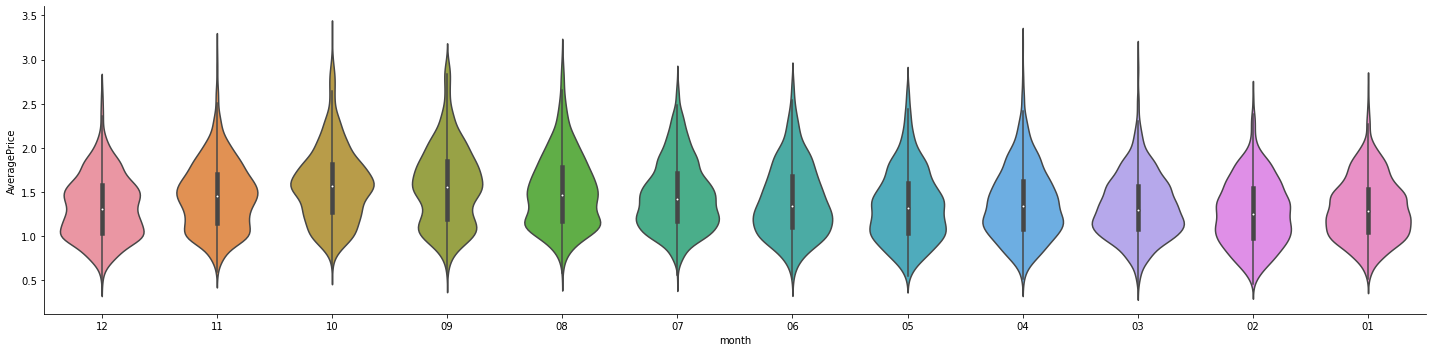

In [121]:
plt.figure(figsize=(20,10))
sns.catplot(x = "month", y = "AveragePrice", kind ='violin', data=data, aspect=4)
plt.show()

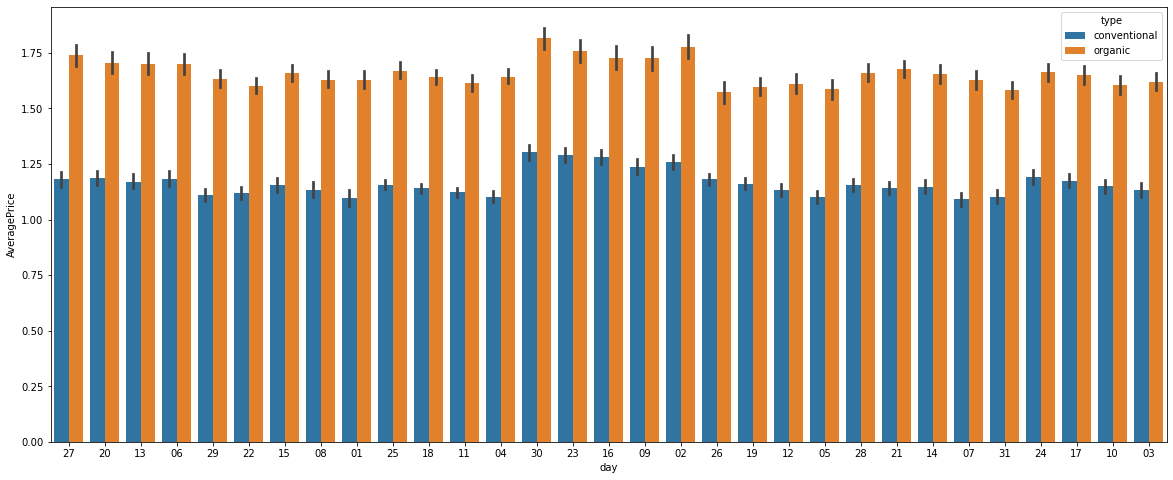

In [115]:
plt.figure(figsize=(20,8))
sns.barplot(x='day', y='AveragePrice', hue='type',data=data)
plt.show()

<Figure size 1440x720 with 0 Axes>

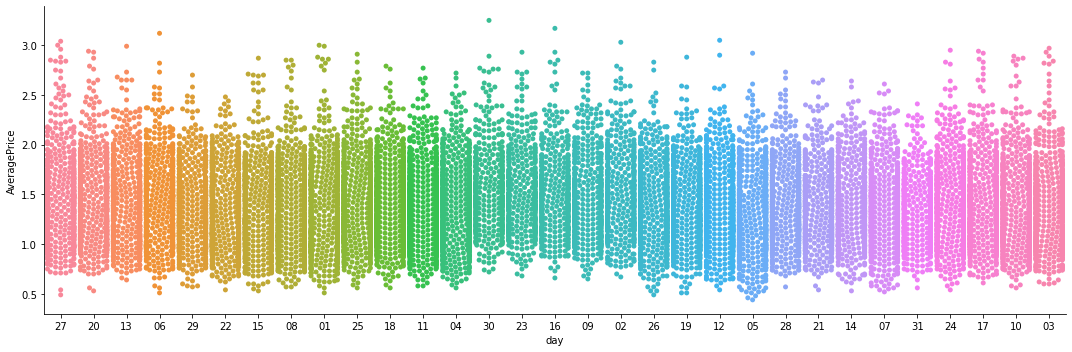

In [122]:
plt.figure(figsize=(20,10))
sns.catplot(x = "day", y = "AveragePrice", kind ='swarm', data=data, aspect=3)
plt.show()

<Figure size 1440x720 with 0 Axes>

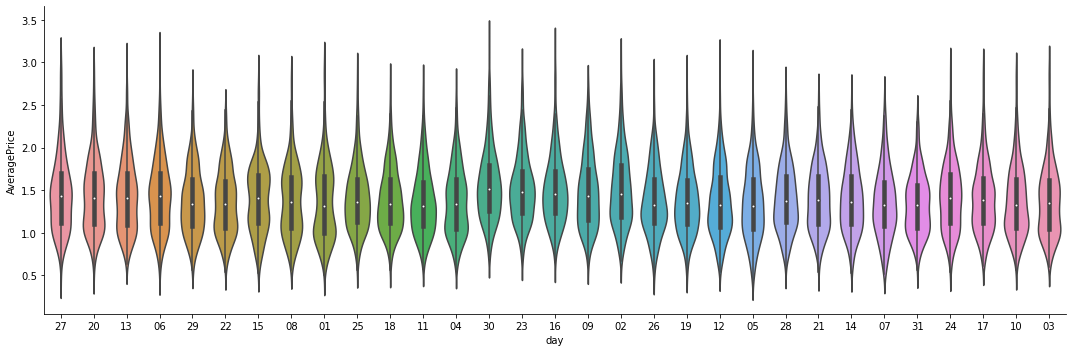

In [123]:
plt.figure(figsize=(20,10))
sns.catplot(x = "day", y = "AveragePrice", kind ='violin', data=data, aspect=3)
plt.show()

#### Observations:
1. For every month the sell of conventional avocado is greater than organic.
2. For 8th, 9th and 10th month the price is high and in this time the sales are minimum.
3. For 1st, 2nd and 3rd month the price is low and in this time the sales are maximum.
4. For every day also, the sell of conventional avocado is greater than organic. 

#### Analysis of another features:

<AxesSubplot:xlabel='Total_Volume', ylabel='type'>

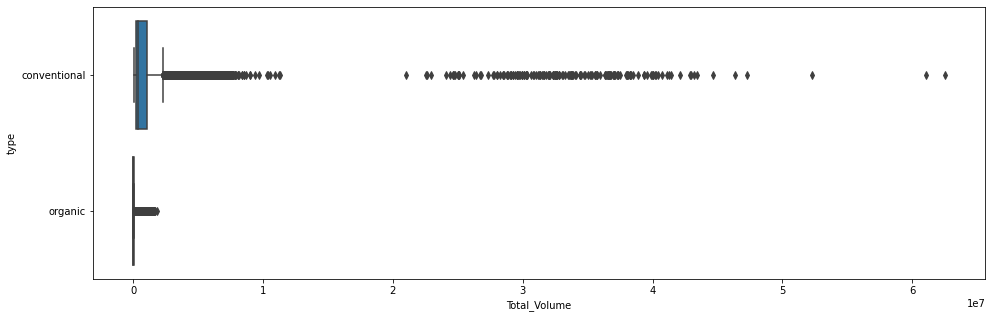

In [92]:
plt.figure(figsize=(16,5))
sns.boxplot(y="type", x="Total_Volume", data=data)

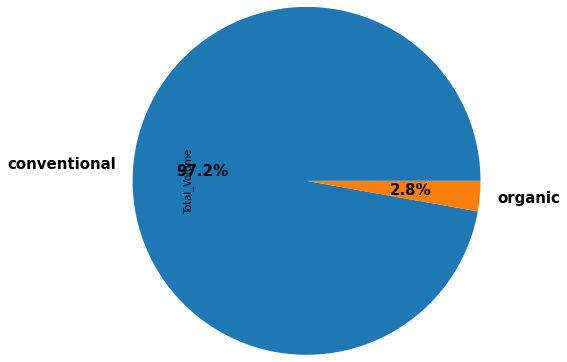

In [90]:
data.groupby('type')['Total_Volume'].mean().plot.pie(radius =2, textprops ={'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

#### Observations:
1. 97% are conventional avocado.The volume of conventional is greater for every region wise data.
2. outliers are present in both types of avocado data

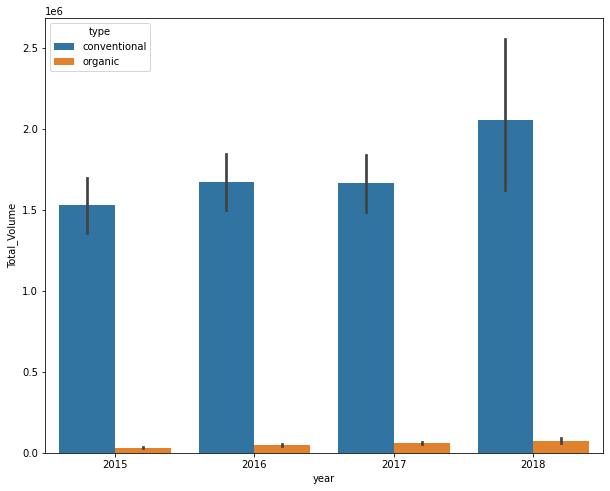

In [101]:
plt.figure(figsize=(10,8))
sns.barplot(x='year', y='Total_Volume', hue='type',data=data)
plt.show()

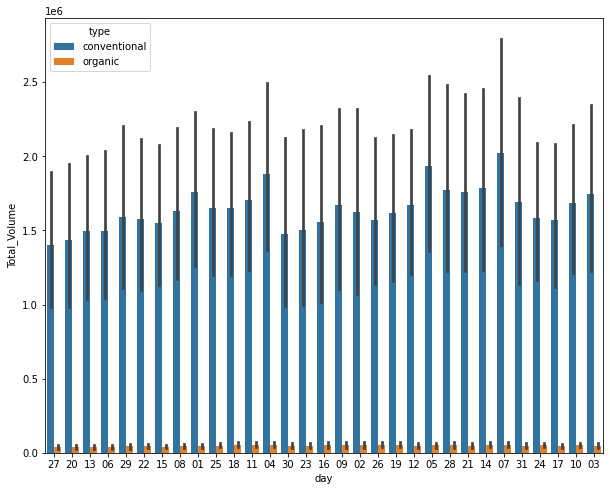

In [124]:
plt.figure(figsize=(10,8))
sns.barplot(x='day', y='Total_Volume', hue='type',data=data)
plt.show()

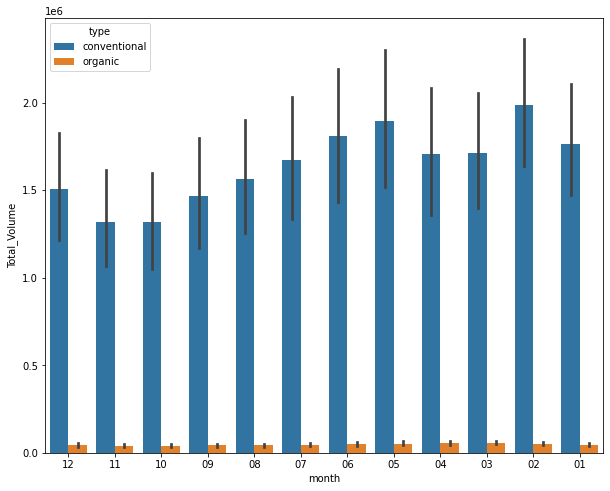

In [125]:
plt.figure(figsize=(10,8))
sns.barplot(x='month', y='Total_Volume', hue='type',data=data)
plt.show()

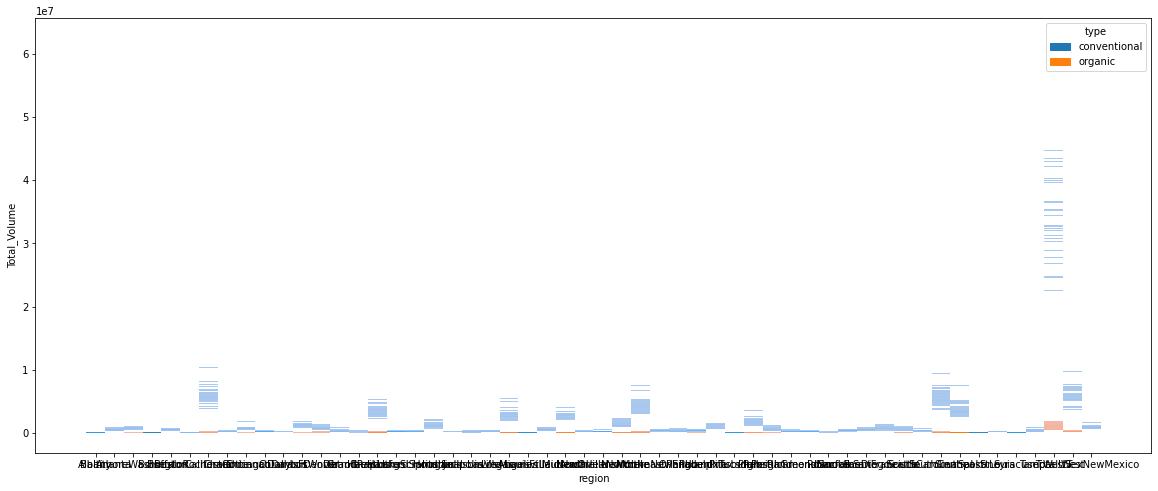

In [108]:
plt.figure(figsize=(20,8))
sns.histplot(x='region', y='Total_Volume', hue='type',data=data)
plt.show()

#### Observations:

1. volume of avocado is highest for yr 2018
2. the volume of organic avocado increased gradually w.r. to year
3. volume of avocado mainly high for the 4th to 7th day of the months
4. volume of avocado is highest for 2nd month

<Figure size 1440x720 with 0 Axes>

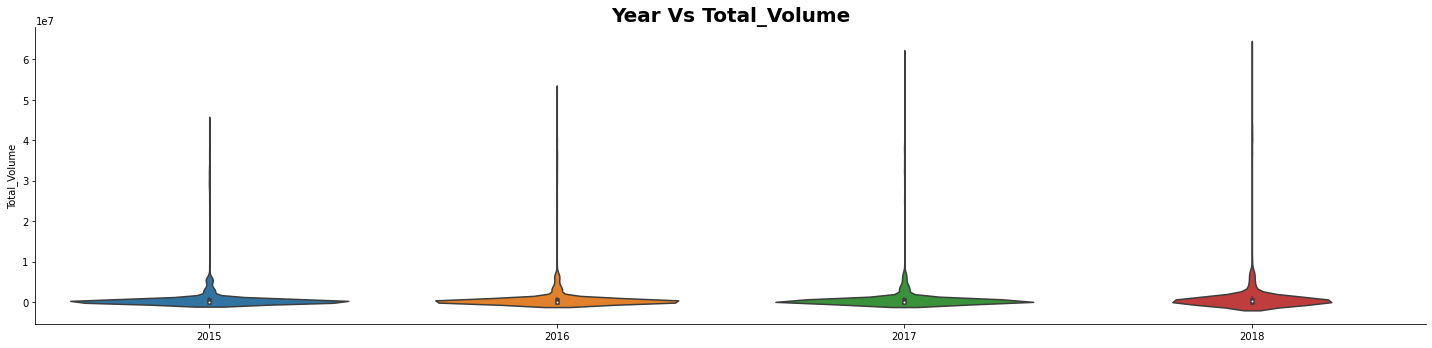

In [127]:
plt.figure(figsize =(20,10))
sns.catplot(x = 'year',y ='Total_Volume',kind = 'violin',data = data, aspect=4)
plt.xlabel("",fontsize=20)
plt.title("Year Vs Total_Volume", fontsize= 20,fontweight= "bold" )
plt.show()

<Figure size 1440x720 with 0 Axes>

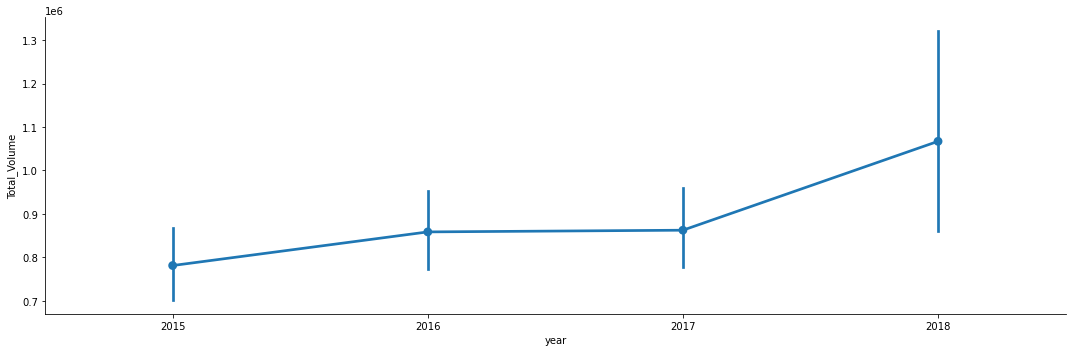

In [131]:
plt.figure(figsize=(20,10))
sns.catplot(x = "year", y = "Total_Volume", kind ='point', data=data, aspect=3)
plt.show()

<Figure size 1440x720 with 0 Axes>

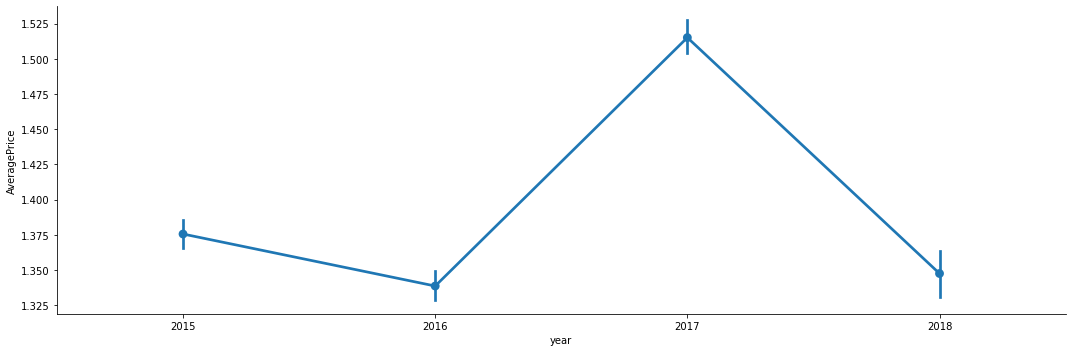

In [135]:
plt.figure(figsize=(20,10))
sns.catplot(x = "year", y = "AveragePrice", kind ='point', data=data, aspect=3)
plt.show()

<Figure size 1440x720 with 0 Axes>

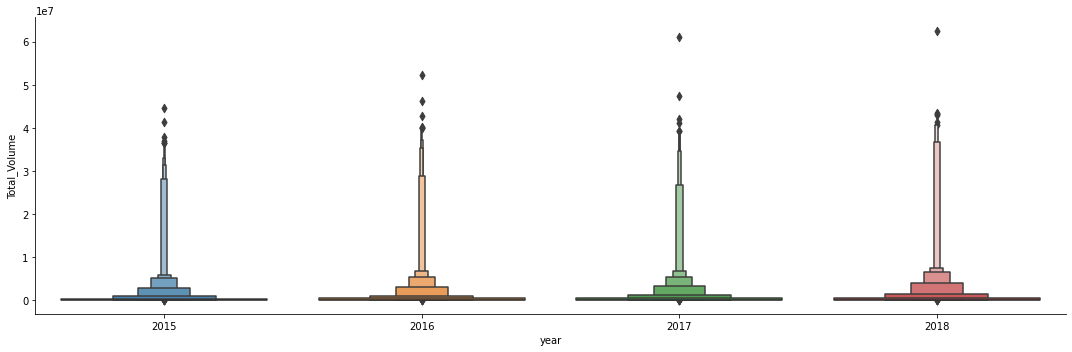

In [134]:
plt.figure(figsize=(20,10))
sns.catplot(x = "year", y = "Total_Volume", kind ='boxen', data=data, aspect=3)
plt.show()

<Figure size 1440x720 with 0 Axes>

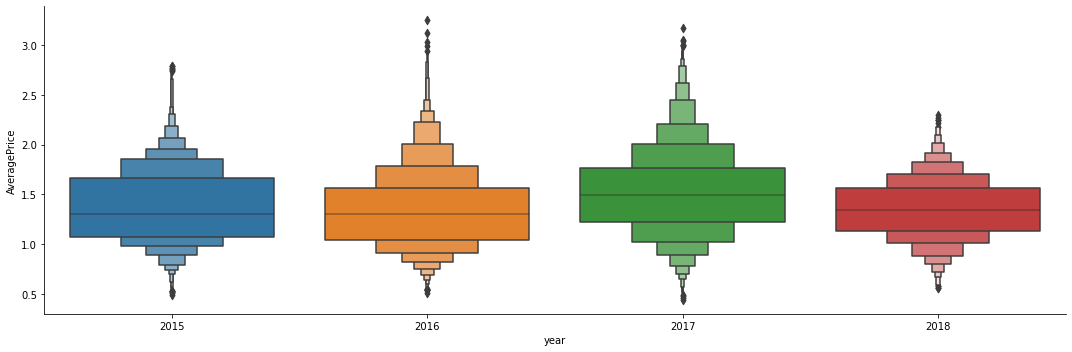

In [133]:
plt.figure(figsize=(20,10))
sns.catplot(x = "year", y = "AveragePrice", kind ='boxen', data=data, aspect=3)
plt.show()

#### Observations:
1. Outliers are present in every years
2. the price is low for year 2018 , the sale is comparatively high
3. we can see that, sale is affected by price. 

In [141]:
data.groupby(['year','type'])['AveragePrice'].agg([min,max,sum])

min   max      sum
year type                             
2015 conventional  0.49  1.59  3026.92
     organic       0.81  2.79  4697.02
2016 conventional  0.51  2.20  3104.51
     organic       0.58  3.25  4413.29
2017 conventional  0.46  2.22  3705.97
     organic       0.44  3.17  4963.59
2018 conventional  0.56  1.74   730.87
     organic       1.01  2.30  1015.53

In [142]:
data.groupby(['year','type'])['Total_Volume'].agg([min,max,sum])

min          max           sum
year type                                             
2015 conventional  35852.68  44655461.51  4.296599e+09
     organic          84.56    912681.57  8.886943e+07
2016 conventional  33699.68  52288697.89  4.690250e+09
     organic         385.55   1475457.53  1.306401e+08
2017 conventional  43715.52  61034457.10  4.766166e+09
     organic         515.01   1634877.11  1.681399e+08
2018 conventional  65757.32  62505646.52  1.334206e+09
     organic        2064.90   1814929.97  4.853227e+07

In [143]:
data.groupby(['year','type'])['Large_Bags'].agg([min,max,sum])

min         max           sum
year type                                         
2015 conventional   0.00  1371440.28  1.231692e+08
     organic        0.00   148734.45  8.897192e+06
2016 conventional   0.00  3373077.87  3.136371e+08
     organic        0.00   325375.97  2.298920e+07
2017 conventional   0.00  4324231.19  3.713655e+08
     organic        0.00   561530.39  2.797352e+07
2018 conventional  80.08  5719096.61  1.177311e+08
     organic        0.00   267818.31  5.852903e+06

In [144]:
data.groupby(['year','type'])['XLarge_Bags'].agg([min,max,sum])

min        max          sum
year type                                     
2015 conventional  0.0  199305.12   5443128.28
     organic       0.0       0.00         0.00
2016 conventional  0.0  551693.65  20038284.84
     organic       0.0       0.00         0.00
2017 conventional  0.0  377661.06  23991658.41
     organic       0.0     265.79      5513.93
2018 conventional  0.0  309467.53   7205184.07
     organic       0.0     510.41      5407.80

In [145]:
data.groupby(['year'])['XLarge_Bags'].agg([min,max,sum])

min        max          sum
year                             
2015  0.0  199305.12   5443128.28
2016  0.0  551693.65  20038284.84
2017  0.0  377661.06  23997172.34
2018  0.0  309467.53   7210591.87

#### Observations:

1. XLarge_bags sales increased rapidly in 2018 compare to 2015.
2. Large_Bags  sales also increased rapidly in 2018 compare to 2015.


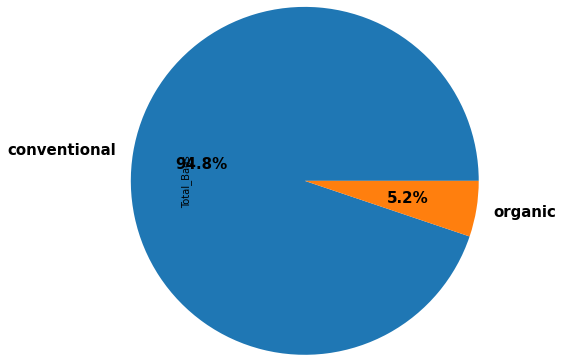

In [146]:
data.groupby('type')['Total_Bags'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

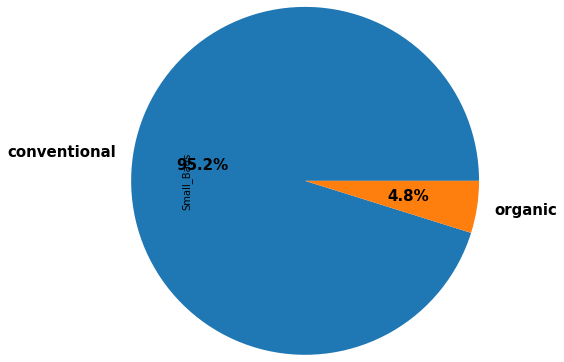

In [147]:
data.groupby('type')['Small_Bags'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

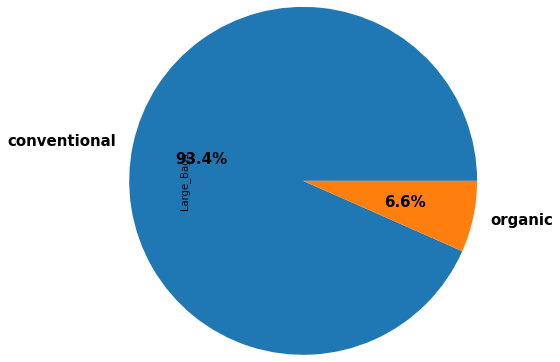

In [148]:
data.groupby('type')['Large_Bags'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

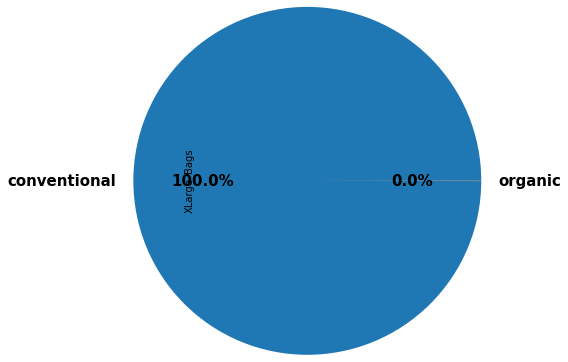

In [149]:
data.groupby('type')['XLarge_Bags'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

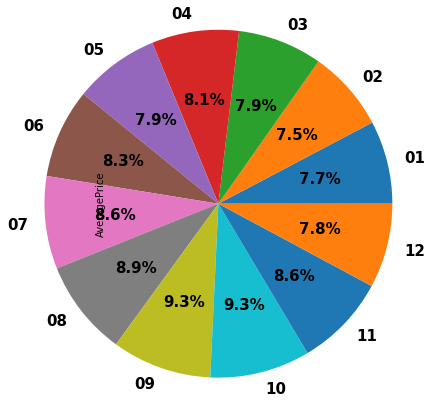

In [150]:
data.groupby('month')['AveragePrice'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

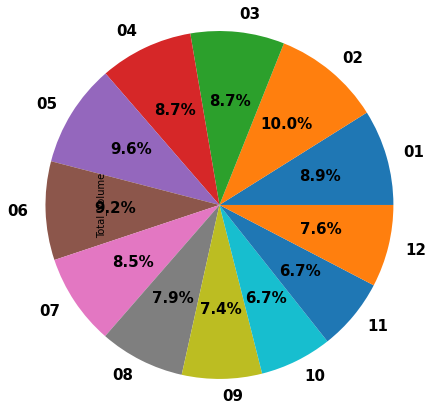

In [151]:
data.groupby('month')['Total_Volume'].mean().plot.pie(radius =2, textprops ={ 'fontsize':15,'fontweight' :'bold'},
                                       autopct='%2.1f%%')
plt.show()

#### Observations:
1. For Total_bags the conventional avocado percentage is 94.8%
2. For Small_Bags the conventional avocado percentage is 95.2%
3. For Large_Bags the conventional avocado percentage is 93.4%
4. For XLarge_Bags the conventional avocado percentage is 100%, there is no organic avocado.
5. Mainly conventional avocado is the best selling and cheaper avocado
6. for 9th and 10th month, price is high and sale is low.

### EDA
#### Univariate analysis:

In [152]:
data_new =data.copy()

In [156]:
# Creating Datframe for numeric features
data.drop(['type','region','year'], axis=1, inplace=True)

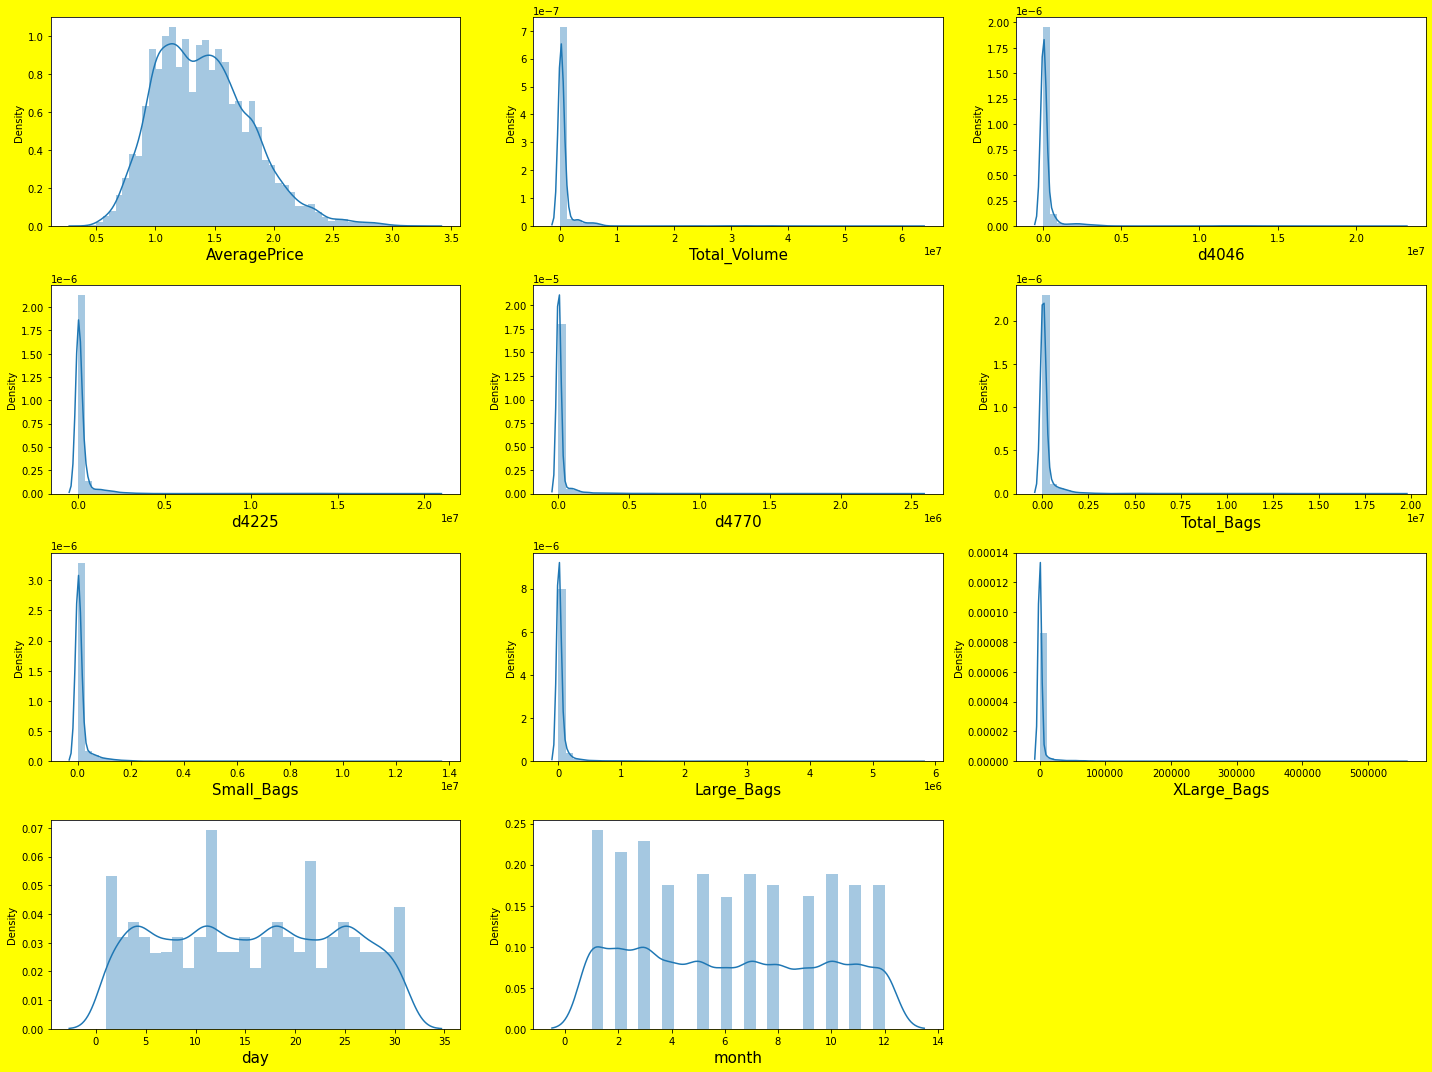

In [157]:
plt.figure(figsize=(20,15),facecolor='yellow')
plno=1
for x in data:
    if plno<=12:
        plt.subplot(4,3,plno)
        sns.distplot(data[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

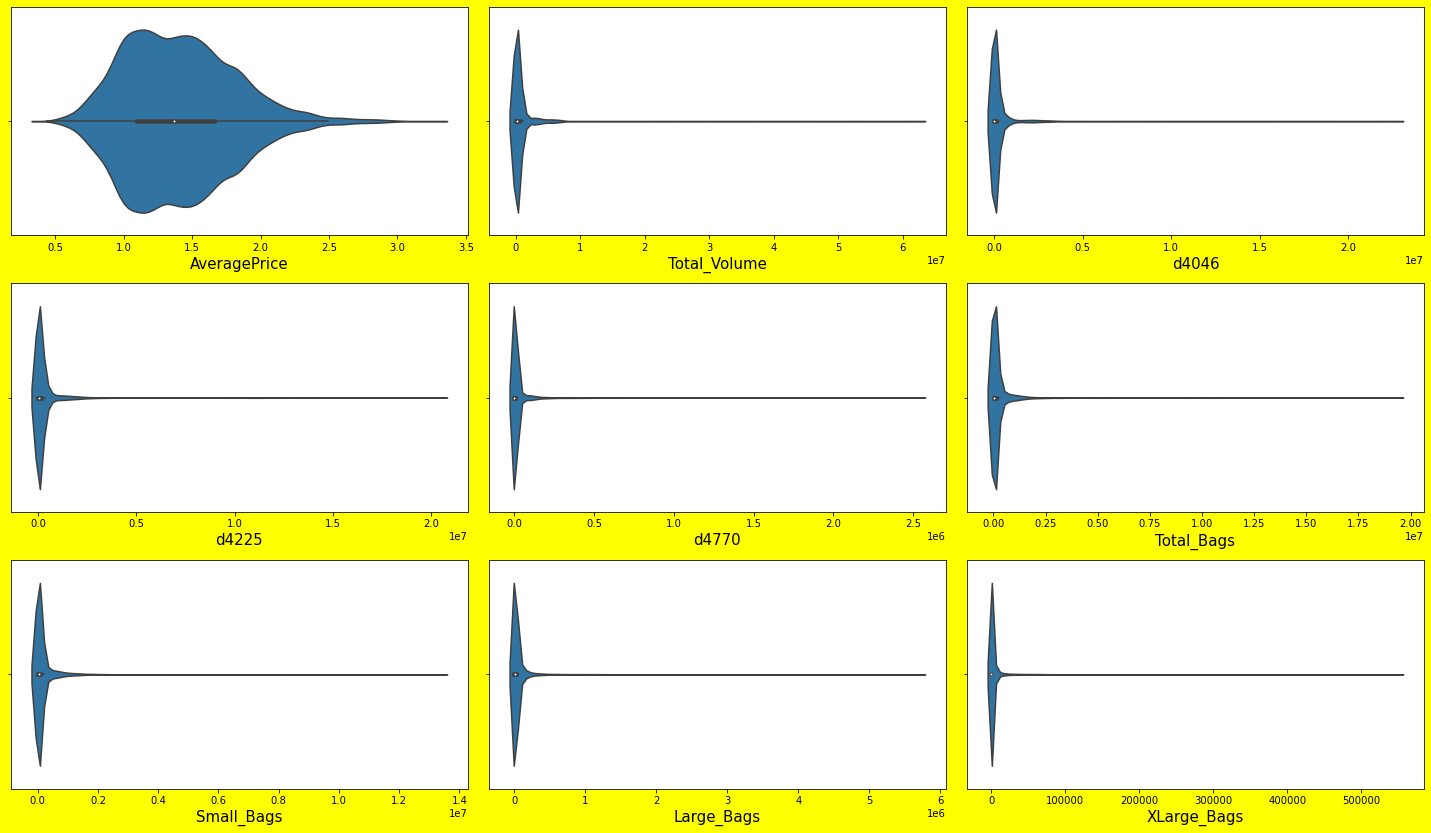

In [159]:
data_new1 =data.copy()
# Creating Datframe for numeric features
data.drop(['day','month'], axis=1, inplace=True)

plt.figure(figsize=(20,15),facecolor='yellow')
plno=1
for x in data:
    if plno<=12:
        plt.subplot(4,3,plno)
        sns.violinplot(data[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

#### Observations:

1. Averageprice is in between 1-2
2. For every features,outliers with sharp peak is present.
3. Mainly all features are right skewed.
4. seems outliers are present

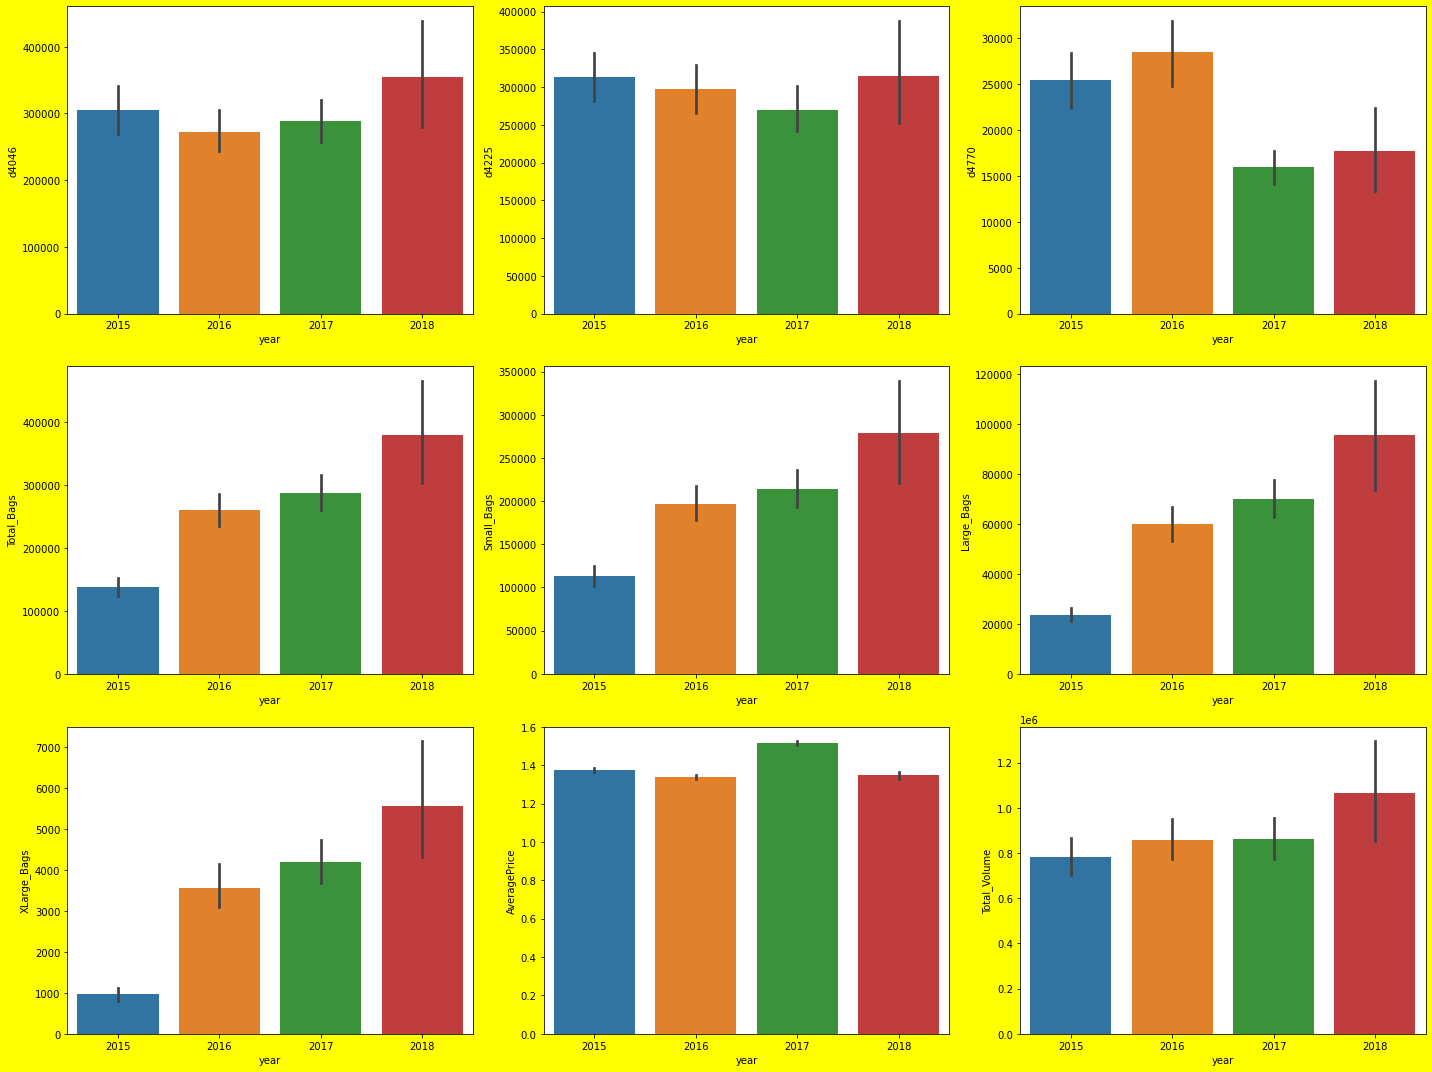

In [174]:
y = data_new[['d4046','d4225','d4770','Total_Bags','Small_Bags', 'Large_Bags', 'XLarge_Bags', 'AveragePrice', 'Total_Volume']]
x = data_new['year']

plt.figure(figsize=(20,15),facecolor='yellow')
plno=1
for i in y:
    if plno<=9:
        plt.subplot(3,3,plno)
        sns.barplot(x,y[i])
    plno +=1
plt.tight_layout()


#### Observations:

1. Sale of all 3 types of bags is increased gradually in every year and max in 2018
2. For 3 types of bags the sale of small bag is max for eveyyear.
3. For 3 types of bags the sale of XLarge bag is min for eveyyear.
4. As earlier, the price is low and the sale is high for year 2018.

### Bivariate Analysis:

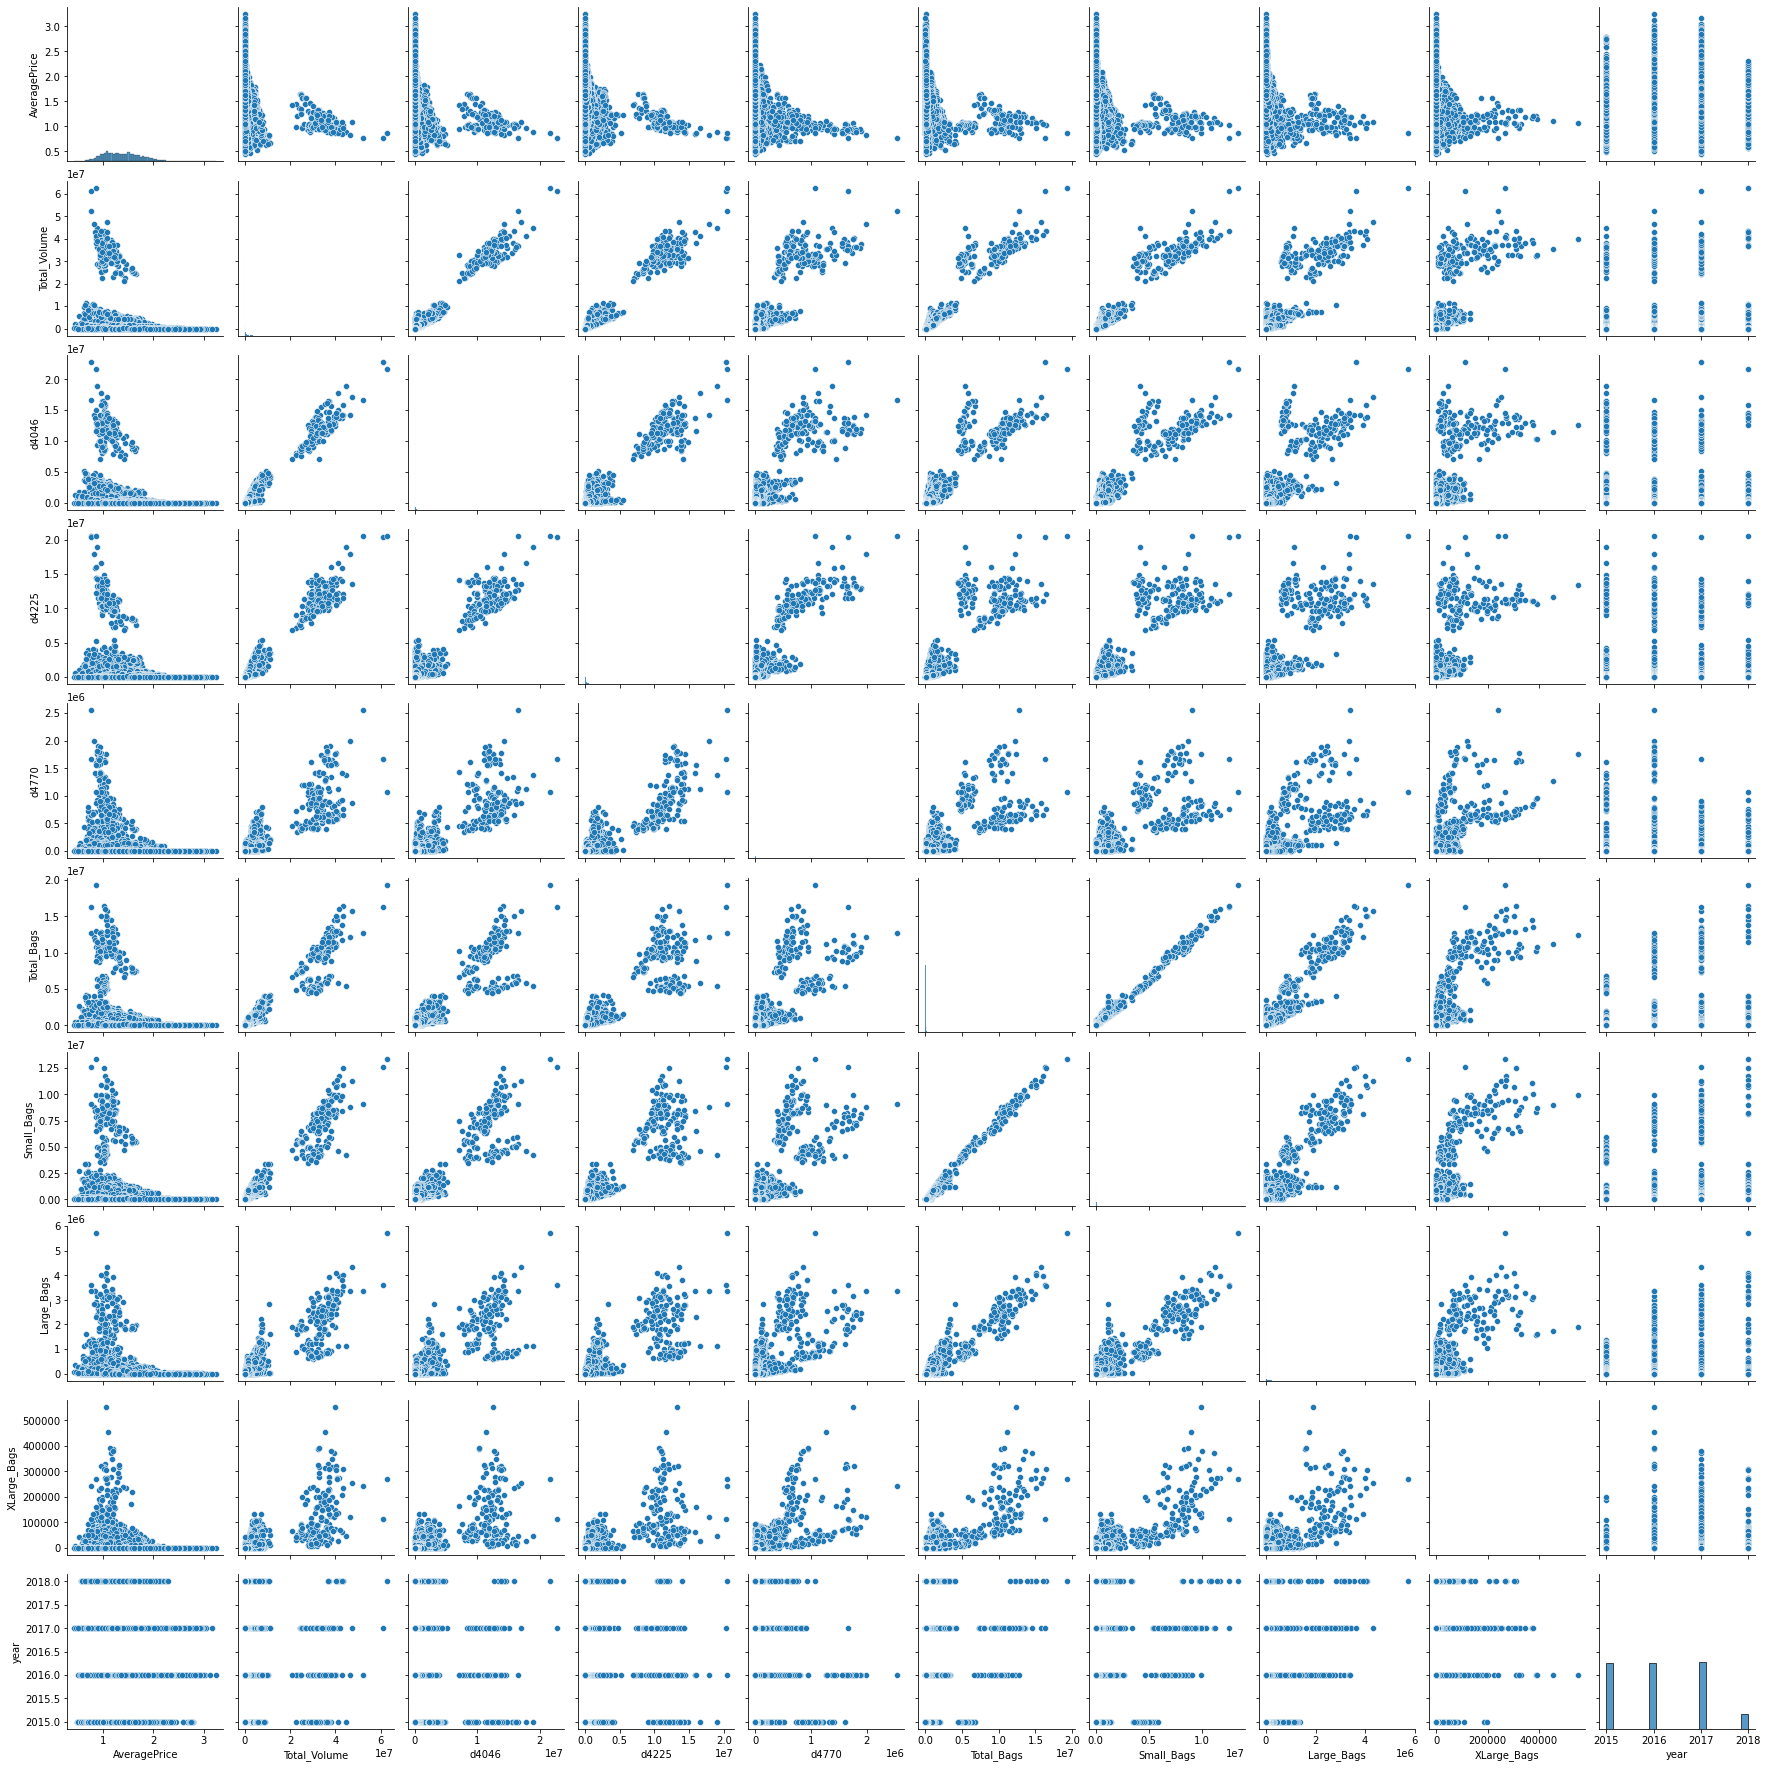

In [175]:
sns.pairplot(data_new)
plt.show()

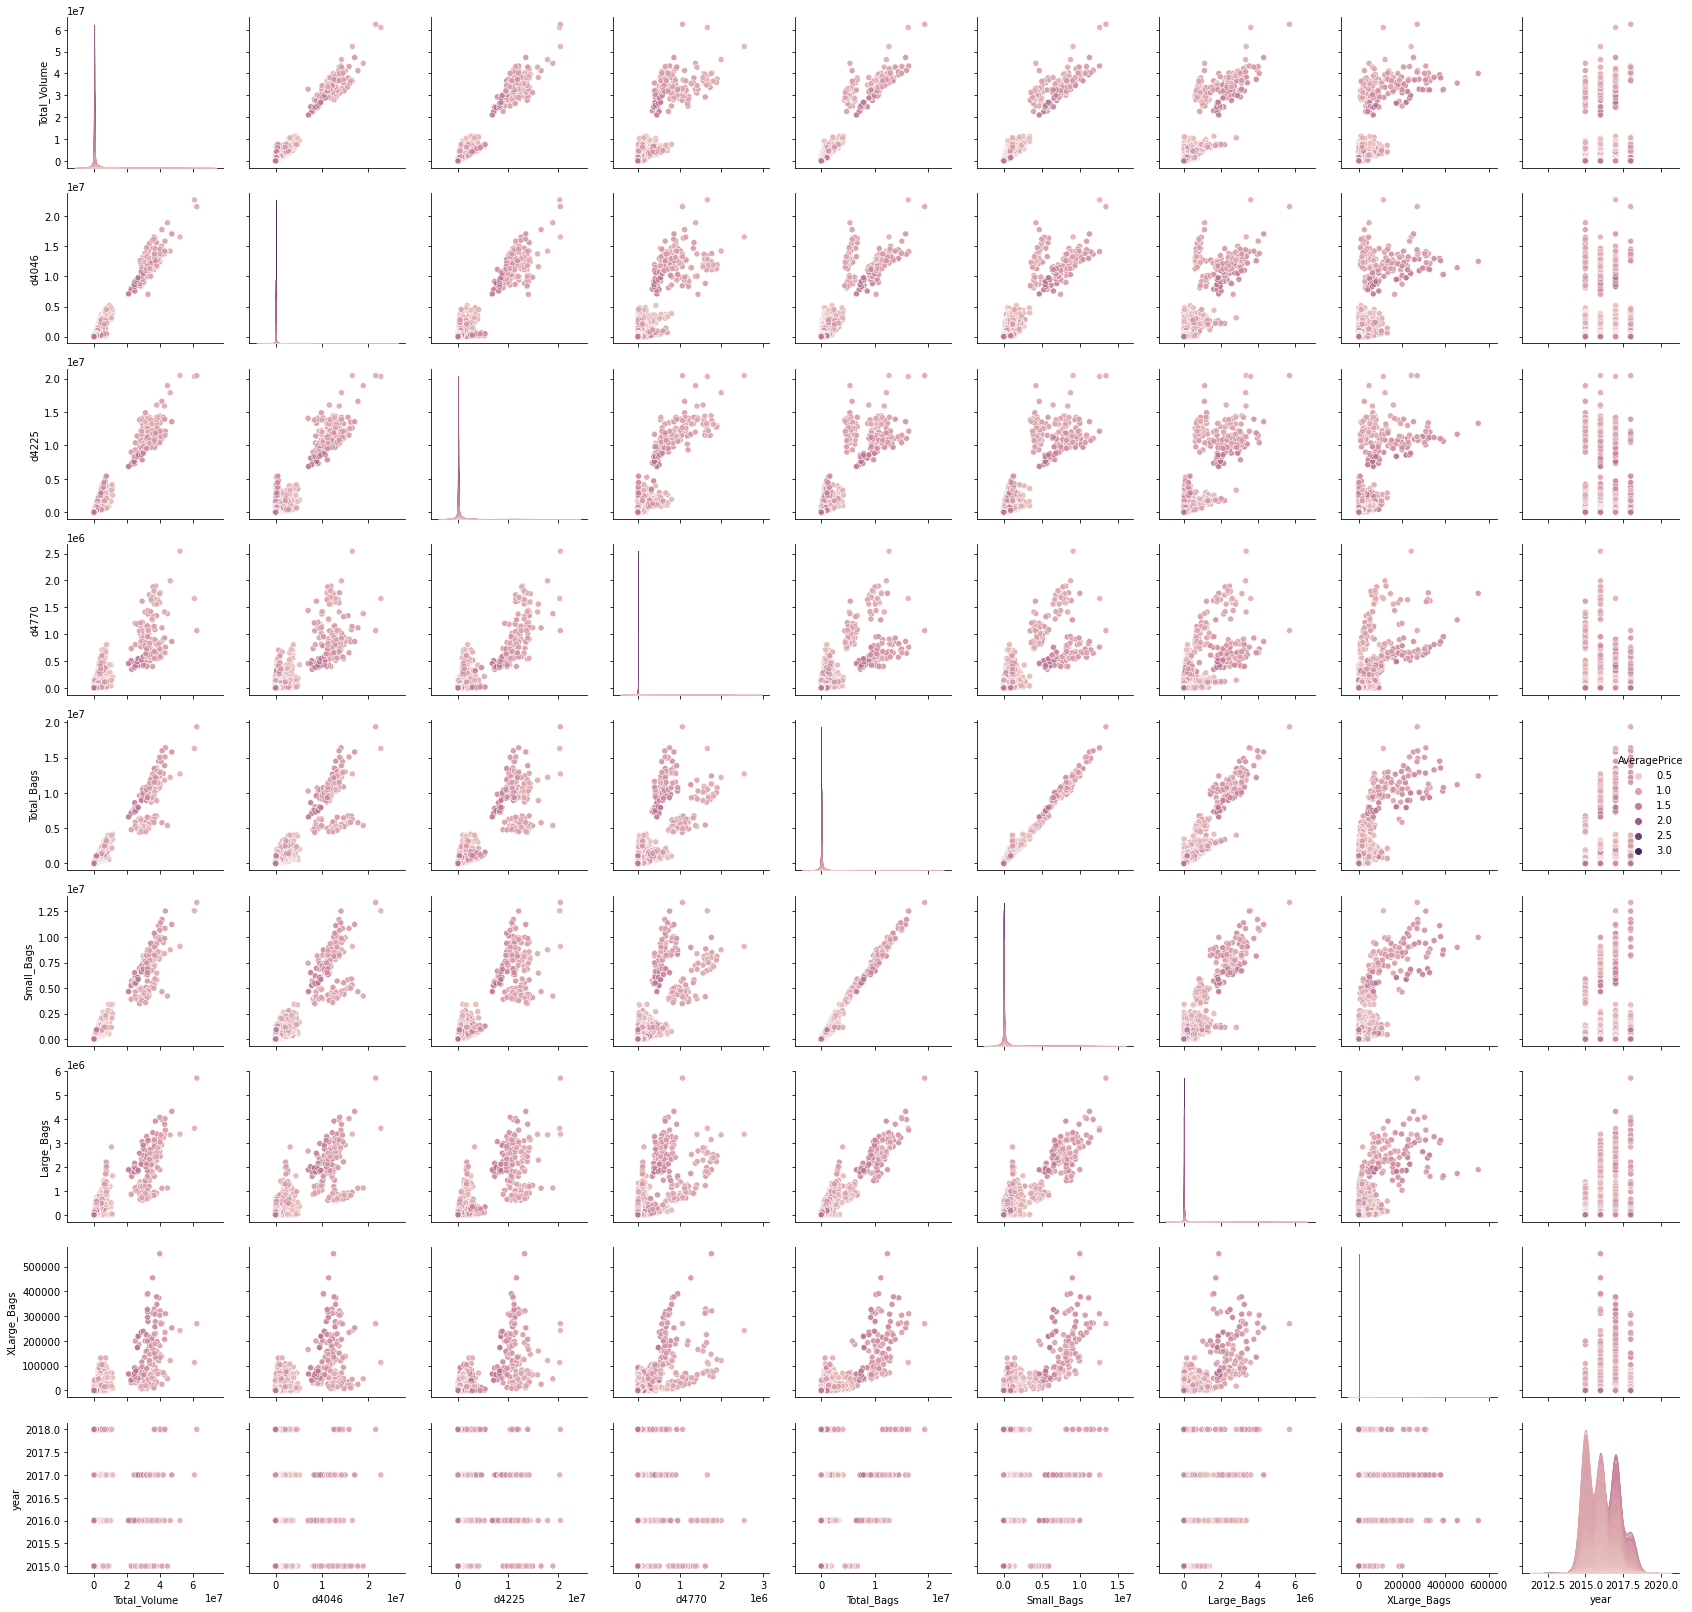

In [176]:
sns.pairplot(data_new, hue= "AveragePrice", kind= 'scatter')
plt.tight_layout()
plt.show()

### Correlations:


In [178]:
data_new.corr()

AveragePrice  Total_Volume     d4046     d4225     d4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total_Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
d4046            -0.208317      0.977863  1.000000  0.926110  0.833389   
d4225            -0.172928      0.974181  0.926110  1.000000  0.887855   
d4770            -0.179446      0.872202  0.833389  0.887855  1.000000   
Total_Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small_Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large_Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge_Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   

              Total_Bags  Small_Bags  Large_Bags  XLarge_Bags      year  
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.093197  
Total_Volume    0.963047    0.967238    0.880640     0.747157  0.017193  
d4046           0.920057    0.925280    0.838645     0.699377  0.003353  
d4225           0.905787    0.916031    0.810015     0.688809 -0.009559  
d4770           0.792314    0.802733    0.698471     0.679861 -0.036531  
Total_Bags      1.000000    0.994335    0.943009     0.804233  0.071552  
Small_Bags      0.994335    1.000000    0.902589     0.806845  0.063915  
Large_Bags      0.943009    0.902589    1.000000     0.710858  0.087891  
XLarge_Bags     0.804233    0.806845    0.710858     1.000000  0.081033  
year            0.071552    0.063915    0.087891     0.081033  1.000000

In [181]:
a= data_new.corr()['AveragePrice'].drop(['AveragePrice'])
a

Total_Volume   -0.192752
d4046          -0.208317
d4225          -0.172928
d4770          -0.179446
Total_Bags     -0.177088
Small_Bags     -0.174730
Large_Bags     -0.172940
XLarge_Bags    -0.117592
year            0.093197
Name: AveragePrice, dtype: float64

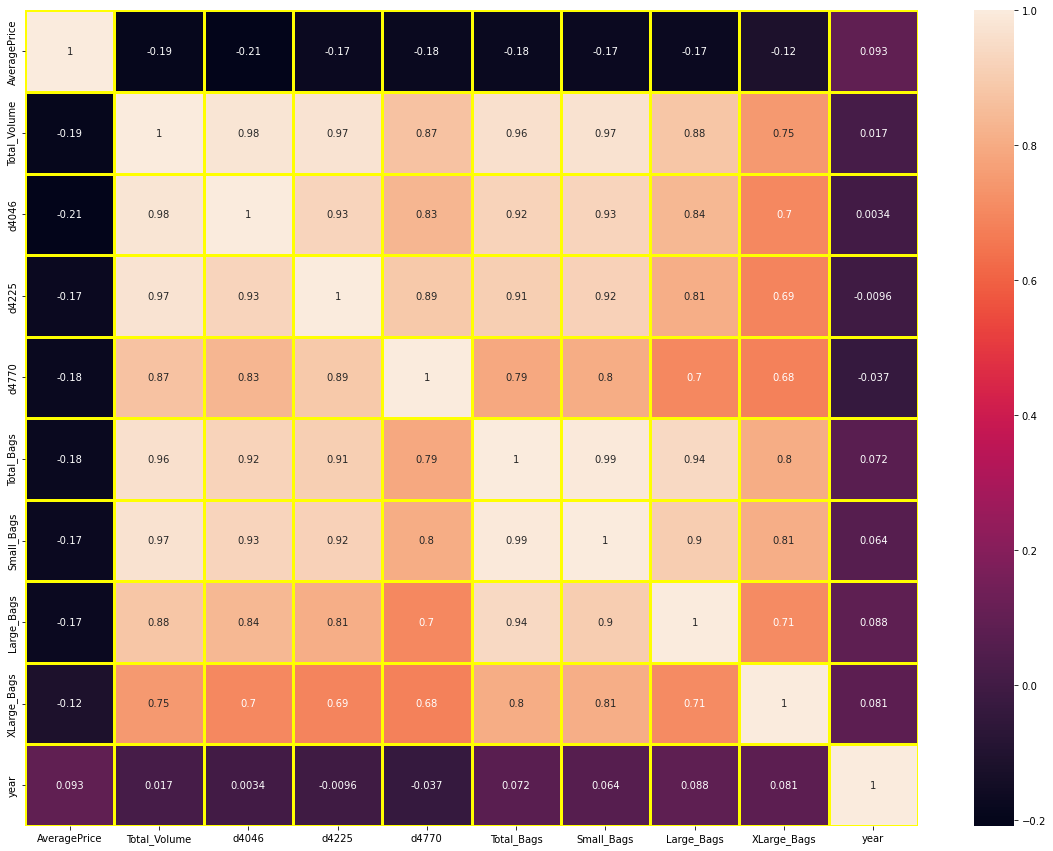

In [180]:
plt.subplots(figsize=(20,15))
sns.heatmap(data_new.corr(), annot= True, linecolor= "yellow",  linewidths= 3)
plt.show()

<AxesSubplot:title={'center':'feature vs Wins corr'}>

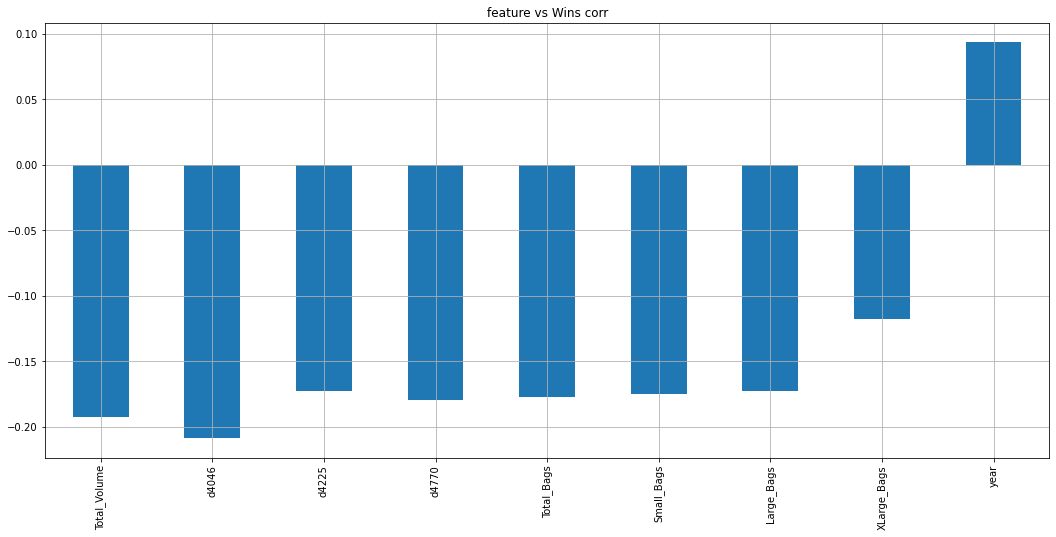

In [182]:
data_new.drop("AveragePrice", axis=1).corrwith(data_new["AveragePrice"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs Wins corr')

#### Observations:
1. 'd4046', 'd4225', 'd4770' are highly correlated with Total_Volume.
2. Small bags are highly correlated with Total Bags correlation coeffient 0.99, this means that most of bags are small.
3. Almost all features except year are highly negatively correlated with the target variable.

### Encoding categorical data:


In [187]:
# Using Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_new['region']=le.fit_transform(data_new['region'])
data_new['type']=le.fit_transform(data_new['type'])
data_new.head()

AveragePrice  Total_Volume    d4046      d4225   d4770  Total_Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small_Bags  Large_Bags  XLarge_Bags  type  year  region day month  
0     8603.62       93.25          0.0     0  2015       0  27    12  
1     9408.07       97.49          0.0     0  2015       0  20    12  
2     8042.21      103.14          0.0     0  2015       0  13    12  
3     5677.40      133.76          0.0     0  2015       0  06    12  
4     5986.26      197.69          0.0     0  2015       0  29    11

In [191]:
data_new['month'] = pd.to_numeric(data_new['month'])

In [193]:
data_new['day'] = pd.to_numeric(data_new['day'])

In [194]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total_Volume  18249 non-null  float64
 2   d4046         18249 non-null  float64
 3   d4225         18249 non-null  float64
 4   d4770         18249 non-null  float64
 5   Total_Bags    18249 non-null  float64
 6   Small_Bags    18249 non-null  float64
 7   Large_Bags    18249 non-null  float64
 8   XLarge_Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  day           18249 non-null  int64  
 13  month         18249 non-null  int64  
dtypes: float64(9), int32(2), int64(3)
memory usage: 1.8 MB


In [195]:
data_new.head()

AveragePrice  Total_Volume    d4046      d4225   d4770  Total_Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small_Bags  Large_Bags  XLarge_Bags  type  year  region  day  month  
0     8603.62       93.25          0.0     0  2015       0   27     12  
1     9408.07       97.49          0.0     0  2015       0   20     12  
2     8042.21      103.14          0.0     0  2015       0   13     12  
3     5677.40      133.76          0.0     0  2015       0    6     12  
4     5986.26      197.69          0.0     0  2015       0   29     11

#### Observation:
1. day and month are converted into int from object datatype.
2. encoding of region and type is done

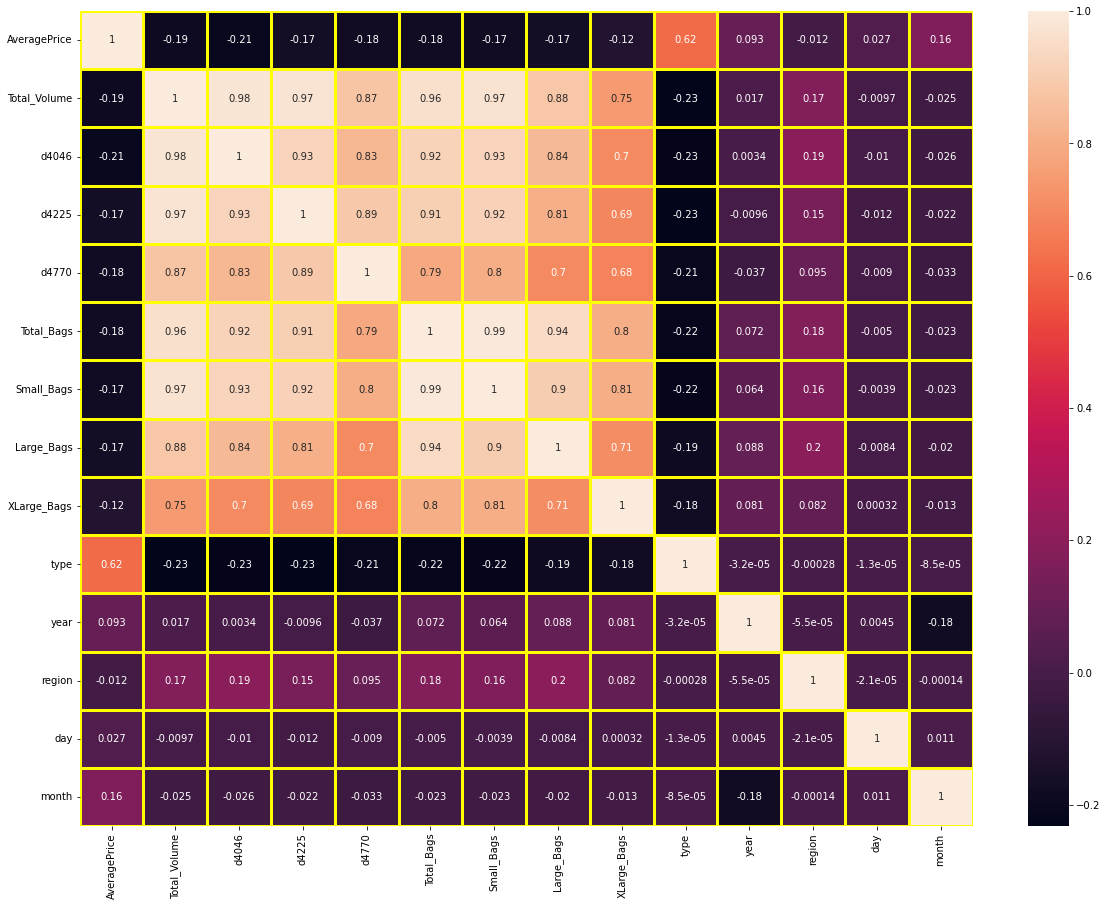

In [196]:
plt.subplots(figsize=(20,15))
sns.heatmap(data_new.corr(), annot= True, linecolor= "yellow",  linewidths= 3)
plt.show()

<AxesSubplot:title={'center':'feature vs Wins corr'}>

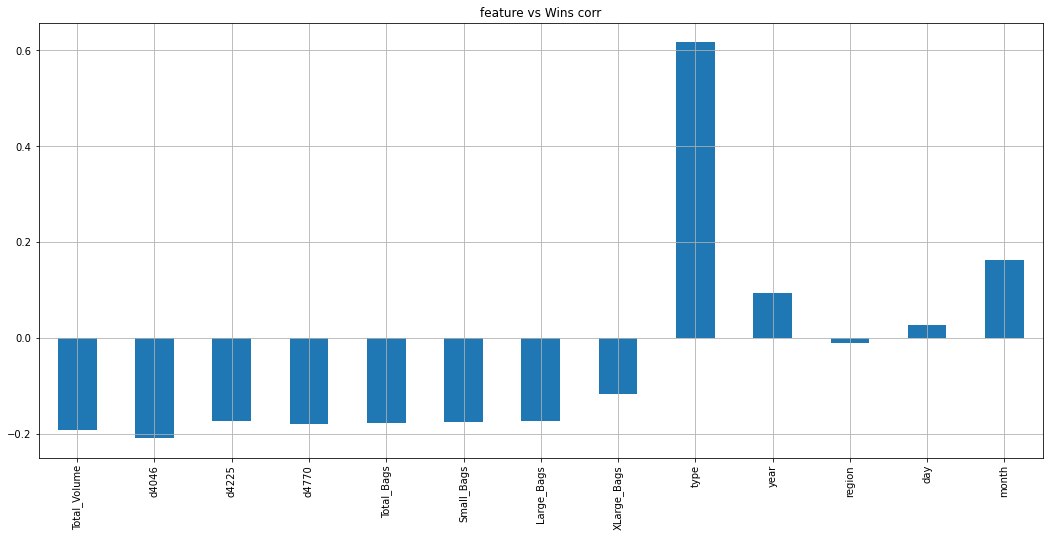

In [197]:
data_new.drop("AveragePrice", axis=1).corrwith(data_new["AveragePrice"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs Wins corr')

#### Observations:
After encoding type, day, months are also positively correlatd with target

###  Outliers Detection and Removal:

AveragePrice       AxesSubplot(0.125,0.657941;0.133621x0.222059)
Total_Volume    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
d4046            AxesSubplot(0.44569,0.657941;0.133621x0.222059)
d4225           AxesSubplot(0.606034,0.657941;0.133621x0.222059)
d4770           AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Total_Bags         AxesSubplot(0.125,0.391471;0.133621x0.222059)
Small_Bags      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Large_Bags       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
XLarge_Bags     AxesSubplot(0.606034,0.391471;0.133621x0.222059)
type            AxesSubplot(0.766379,0.391471;0.133621x0.222059)
year                  AxesSubplot(0.125,0.125;0.133621x0.222059)
region             AxesSubplot(0.285345,0.125;0.133621x0.222059)
day                 AxesSubplot(0.44569,0.125;0.133621x0.222059)
month              AxesSubplot(0.606034,0.125;0.133621x0.222059)
dtype: object

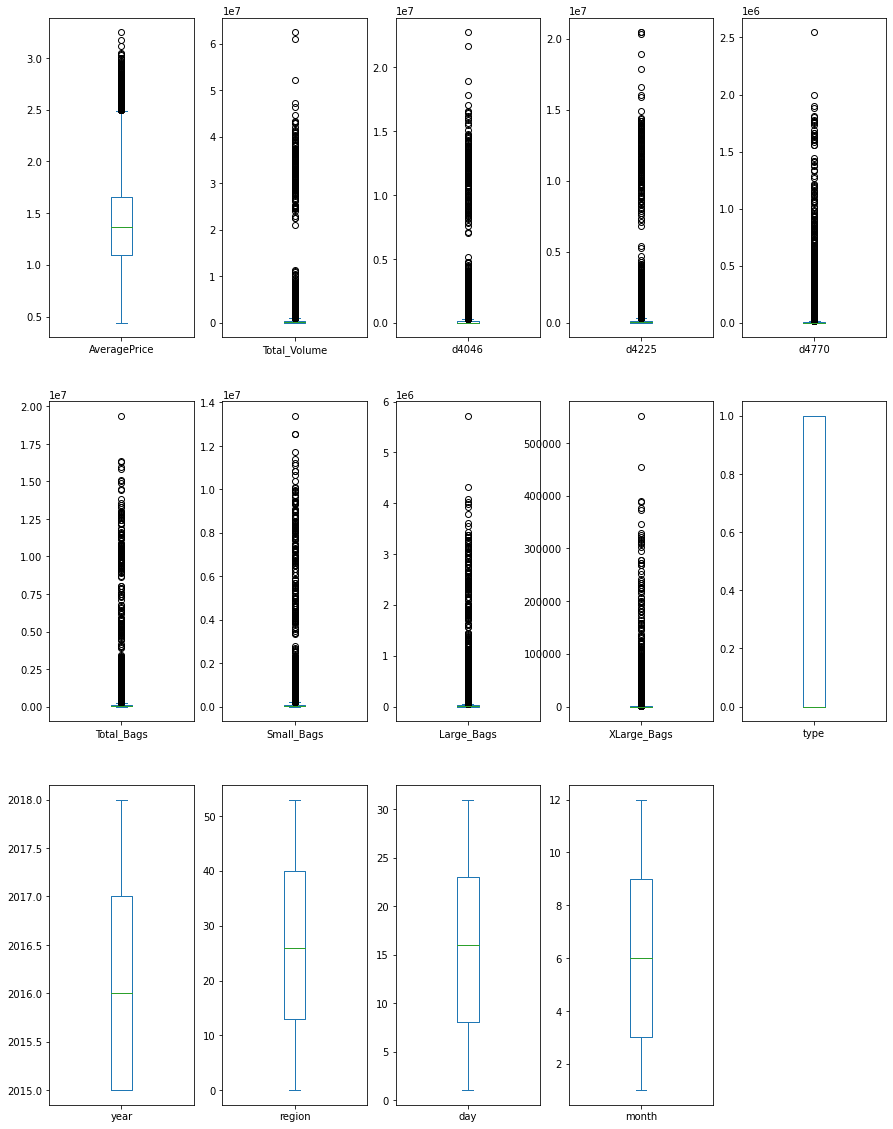

In [199]:
data_new.plot(kind ='box', subplots =True , layout =(3,5), figsize = (15,20))

From the previous Boxplot , it is seen that there is outiers in featues columns.
Let's remove it.
#### Using Z score method:
Let's take the Z Score =3
Any data with Z Score>3, should to be rejected 

In [200]:
from scipy.stats import zscore
z = np.abs(zscore(data_new))
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 8, ..., 0, 0, 0], dtype=int64))


In [201]:
data_new1 = data_new[(z<3).all(axis = 1)]
data_new1.head()

AveragePrice  Total_Volume    d4046      d4225   d4770  Total_Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small_Bags  Large_Bags  XLarge_Bags  type  year  region  day  month  
0     8603.62       93.25          0.0     0  2015       0   27     12  
1     9408.07       97.49          0.0     0  2015       0   20     12  
2     8042.21      103.14          0.0     0  2015       0   13     12  
3     5677.40      133.76          0.0     0  2015       0    6     12  
4     5986.26      197.69          0.0     0  2015       0   29     11

In [202]:
data_new1.shape

(17651, 14)

In [204]:
data_new.shape

(18249, 14)

#### Observations:
the data loss= (18249-17651)= 598 datapoints

### Checking Multicollinearity:

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(data_new1.values,i)for i in range(data_new1.shape[1])]
vif["Features"] = data_new1.columns
vif

VIF      Features
0   2.499139e+01  AveragePrice
1   4.977395e+08  Total_Volume
2   8.727666e+07         d4046
3   7.504348e+07         d4225
4   5.281429e+05         d4770
5   2.333471e+13    Total_Bags
6   1.518921e+13    Small_Bags
7   1.478286e+12    Large_Bags
8   7.092970e+09   XLarge_Bags
9   3.729001e+00          type
10  2.542391e+01          year
11  4.114701e+00        region
12  4.203526e+00           day
13  4.218813e+00         month

#### Observations:
Here 'd4046','d4225','d4770', 'Total_Bags' is very poorly correlated(negetive correlation) with label. Lets drop the features

In [218]:
df1= data_new1.copy()

In [220]:
df1.drop(columns=['d4046','d4225','d4770', 'Total_Bags'],axis=1, inplace=True)

In [221]:
vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(df1.values,i)for i in range(df1.shape[1])]
vif["Features"] = df1.columns
vif

VIF      Features
0  24.391858  AveragePrice
1   7.758703  Total_Volume
2   7.713459    Small_Bags
3   1.989704    Large_Bags
4   1.707791   XLarge_Bags
5   3.651418          type
6  25.116718          year
7   3.986725        region
8   4.202566           day
9   4.212384         month

As for all feature VIF is within 10 except year.
Let's drop it

In [223]:
df1.drop(columns=['year'],axis=1, inplace=True)

In [224]:
vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(df1.values,i)for i in range(df1.shape[1])]
vif["Features"] = df1.columns
vif

VIF      Features
0  11.529098  AveragePrice
1   7.622556  Total_Volume
2   7.694569    Small_Bags
3   1.983616    Large_Bags
4   1.707415   XLarge_Bags
5   3.510587          type
6   3.589139        region
7   3.743035           day
8   4.043740         month

### Checking Skewness:

In [225]:
df1.skew()

AveragePrice    0.377432
Total_Volume    3.767138
Small_Bags      4.222706
Large_Bags      5.053434
XLarge_Bags     6.135607
type           -0.037741
region          0.012798
day             0.011778
month           0.107408
dtype: float64

#### Observations:

1. The standard range for skewness is between -0.5 to 0.5.
2. Total_Volume, Small_Bags, Large_Bags, XLarge_Bags are positively skewed in nature, need to transform.

#### Let's transform all the positive skewed data using log transformation:

In [234]:
df_new= df1.copy()

In [235]:
from sklearn.preprocessing import PowerTransformer
scaler= PowerTransformer(method= 'yeo-johnson')

features=['Total_Volume', 'Small_Bags', 'Large_Bags', 'XLarge_Bags']
df_new[features]= scaler.fit_transform(df_new[features].values)
df_new[features].head()

Total_Volume  Small_Bags  Large_Bags  XLarge_Bags
0     -0.075324   -0.347421   -0.781153    -0.677919
1     -0.147497   -0.311322   -0.771198    -0.677919
2      0.205556   -0.374453   -0.758523    -0.677919
3      0.019655   -0.510991   -0.699123    -0.677919
4     -0.180674   -0.490534   -0.607027    -0.677919

In [236]:
df_new.skew()

AveragePrice    0.377432
Total_Volume   -0.008642
Small_Bags     -0.024405
Large_Bags     -0.110913
XLarge_Bags     0.853758
type           -0.037741
region          0.012798
day             0.011778
month           0.107408
dtype: float64

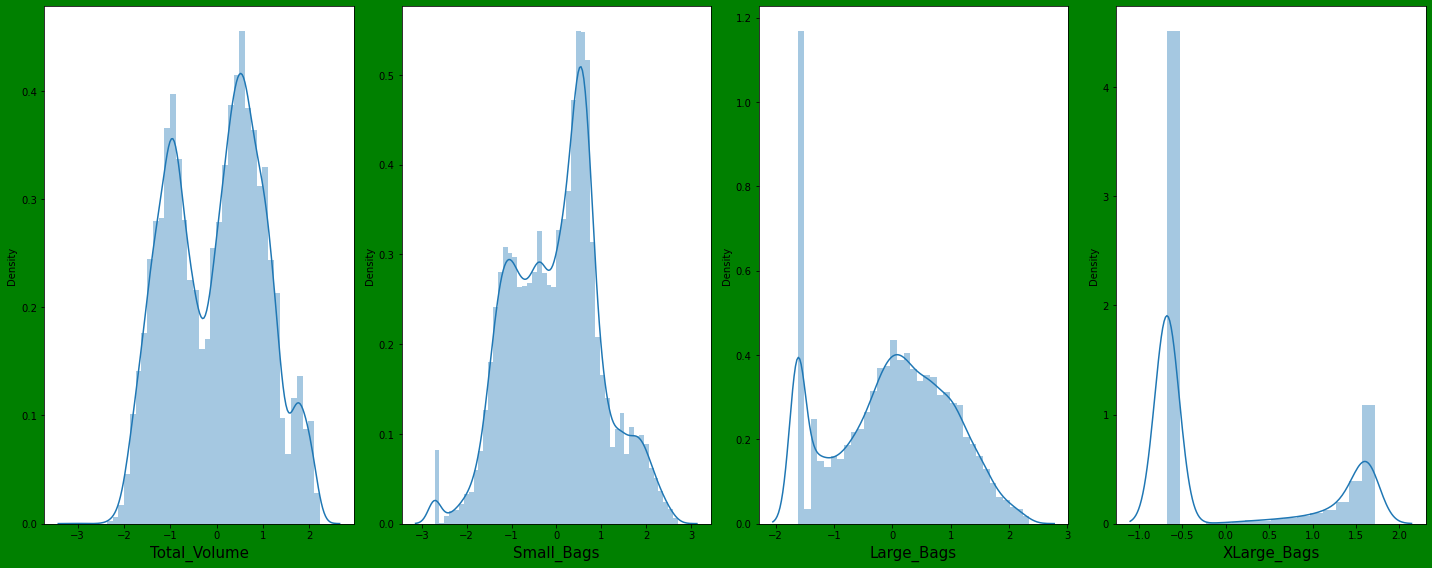

In [238]:
plt.figure(figsize=(20,8),facecolor='green')
plno=1
for x in df_new[features]:
    if plno<=4:
        plt.subplot(1,4,plno)
        sns.distplot(df_new[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

#### Observations:
All skewness are removed from the whole dataset But, XL bags are still skewed, But its ok,
 let's proceed to next step
### Standard Scaling

In [239]:
x = df_new.drop('AveragePrice', axis=1)
y = df_new['AveragePrice']

In [240]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

### Final predictions using different Regression ML Models:
#### Find best Random state:

In [248]:
from sklearn.linear_model import LinearRegression

r2_max=0
random_max=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.47387291717330615 on Random_state 449


In [247]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (13238, 8)
Training target shape: (13238,)
Test feature shape: (4413, 8)
Test target shape: (4413,)


#### Observations:
For random state=449, the accuracy score is best. Lets take this random state for further steps.

### Using LinearRegression()

In [249]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=449)

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.47387291717330615
Mean absolute error: 0.2233615338272971
Mean square error: 0.07988693698126112
Root mean square error: 0.2826427727384182


#### Using GridSearchCV:

In [250]:
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)

grid_lin.fit(x_train, y_train)
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [251]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.47387291717330615
Mean absolute error: 0.2233615338272971
Mean square error: 0.07988693698126112
Root mean square error: 0.2826427727384182


#### Observations:

No such improvement seen after GridSearchCV.
### Using DecisionTreeRegressor():

In [252]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6685970414440985
Mean absolute error: 0.15370043054611374
Mean square error: 0.05032009970541581
Root mean square error: 0.22432142052290907


#### Using GridSearchCV:

In [255]:
param = {'criterion' : ["squared_error", "absolute_error"],
    'splitter' : ["best", "random"],
    'min_samples_leaf' : range(1,3)}

grid_search = GridSearchCV(estimator = dt,cv=5,param_grid = param)
grid_search.fit(x_train, y_train)

print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'squared_error', 'min_samples_leaf': 2, 'splitter': 'best'}


In [256]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6869034809980474
Mean absolute error: 0.1506922728302742
Mean square error: 0.04754045685726515
Root mean square error: 0.21803774181839516


#### Observations:

After using Grid seaech CV, R2 score is slightly increased

### Using KNeighborsRegressor():

In [258]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(0,18):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  1 is: 0.31977661163780435
RMSE value for k=  2 is: 0.27335683204412187
RMSE value for k=  3 is: 0.2572829643710805
RMSE value for k=  4 is: 0.25256427645944934
RMSE value for k=  5 is: 0.24917632724148822
RMSE value for k=  6 is: 0.24796584761962473
RMSE value for k=  7 is: 0.2470674116427453
RMSE value for k=  8 is: 0.2468342788759078
RMSE value for k=  9 is: 0.24678794442797483
RMSE value for k=  10 is: 0.24598420957834943
RMSE value for k=  11 is: 0.24666724013360272
RMSE value for k=  12 is: 0.24658388901411088
RMSE value for k=  13 is: 0.2464920530709544
RMSE value for k=  14 is: 0.24717949383798715
RMSE value for k=  15 is: 0.24740382539219608
RMSE value for k=  16 is: 0.2477425247249733
RMSE value for k=  17 is: 0.2481008166626566
RMSE value for k=  18 is: 0.24839004384657767


In [259]:
min(rmse_val)

0.24598420957834943

#### For k=10 we get the best RMSE value for KNeighborsRegressor()

In [260]:
knn =KNeighborsRegressor(n_neighbors= 10)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6014990628455456
Mean absolute error: 0.19346770904146837
Mean square error: 0.060508231361885344
Root mean square error: 0.24598420957834943


#### Using GridSearchCV

In [261]:
param = {'algorithm' : ['auto','kd_tree', 'brute'],
             'leaf_size' : [30,40,10,],
             'n_neighbors' : [10],'weights': ['uniform', 'distance']}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 10, 'weights': 'distance'}


In [262]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6084829376078092
Mean absolute error: 0.19115366508000048
Mean square error: 0.05944780246318568
Root mean square error: 0.2438192003579408


### Observations:


After using gridsearch r2 score is slightly improved.
### Using RandomForestRegressor():

In [263]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8285071635603503
Mean absolute error: 0.11890362565148427
Mean square error: 0.026039407330614092
Root mean square error: 0.1613673056434112


#### Using GridSearchCV:

In [265]:
params = {'n_estimators' : [100,150,80], 
          'min_samples_split' : [3,2,1], 'min_samples_leaf' : [1,2,3]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)
rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [266]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8302689743498857
Mean absolute error: 0.11806965782914117
Mean square error: 0.02577189464763199
Root mean square error: 0.16053627206221024


#### Observations:

r2 score, RMSE slightly improved after GridSearchCV.
### Using Support Vector Regression():

In [267]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

y_pred = svr_rbf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.6009092291916371
Mean absolute error: 0.1884854502313165
Mean square error: 0.06059779148049023


In [268]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly')
svr_poly.fit(x_train, y_train)

y_pred = svr_poly.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.5308754942196494
Mean absolute error: 0.20751297997298485
Mean square error: 0.07123168727275922


In [269]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train, y_train)

y_pred = svr_lin.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.4734384477069261
Mean absolute error: 0.22176926879871228
Mean square error: 0.07995290666047723


#### Using GridSearchCV:

In [270]:
params = {'gamma':['scale', 'auto'],'C':[1.0,10, 0.1], 'kernel':['rbf']}

svr_grd = GridSearchCV(svr_lin, param_grid = params, cv= 5)
svr_grd.fit(x_train, y_train)
print('best params : ', svr_grd.best_params_)

best params :  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [271]:
grid_svr_best = svr_grd.best_estimator_
grid_svr_best.fit(x_train, y_train)

y_pred = grid_svr_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6300049604710928
Mean absolute error: 0.18051372143414257
Mean square error: 0.05617990666327541
Root mean square error: 0.23702300872125348


#### Observations:


r2 score, RMSE are slightly improved after GridSearchCV.
### Using GradientBoostingRegressor()

In [272]:
from sklearn.ensemble import  GradientBoostingRegressor

gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.675152577482869
Mean absolute error: 0.1720919708649076
Mean square error: 0.04932470959625439
Root mean square error: 0.22209166935356758


#### Using GridSearchCV:

In [273]:
params = {'loss': ['squared_error', 'absolute_error'], 'n_estimators':[100,150,80],
          'min_samples_leaf':[1,2],
         'max_features': ['auto', 'sqrt']}

gbdt_grd = GridSearchCV(gbdt, param_grid = params, cv=5)
gbdt_grd.fit(x_train, y_train)
print('best params : ', gbdt_grd.best_params_)

best params :  {'loss': 'squared_error', 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 150}


In [274]:
grid_gbdt_best = gbdt_grd.best_estimator_

grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7043074612740376
Mean absolute error: 0.16346652332581887
Mean square error: 0.04489784308406557
Root mean square error: 0.21189111138522437


#### Observations:

r2 score, RMSE are improved after GridSearchCV.
### Using AdaBoostRegressor():

In [275]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.4864631122483304
Mean absolute error: 0.22608390335598738
Mean square error: 0.0779752465297138
Root mean square error: 0.2792404815382501


#### Using GridSearchCV:

In [276]:
params = { 'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.01,1] ,
        'n_estimators':[50,40] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 50}


In [277]:
grid_ada_best = ada_grd.best_estimator_

grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5009639907441654
Mean absolute error: 0.2202655298461135
Mean square error: 0.07577343863123825
Root mean square error: 0.2752697561143219


#### Observations:

r2 score, RMSE are slightly improved after GridSearchCV.

#### As per 7 different regression model we can see that the model with maximum R2 score and minimum RMSE value is  RandomForest(). 

Let's check the cross validation score before final prediction.

### Cross Validation:

In [278]:
from sklearn.model_selection import cross_val_score

all_models = [lin_reg , grid_dt_best , grid_knn_best , grid_rf_best , grid_svr_best, grid_gbdt_best, grid_ada_best]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv = 5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression()

 Cross Validation Score :  [-0.74580445 -0.03560123  0.46442719  0.03759221  0.07120993]

Mean CV Score : -0.04163527143920607

Std deviation : 0.3926833060074784

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor(min_samples_leaf=2)

 Cross Validation Score :  [-2.04917011  0.08756043  0.13062093 -0.45401082 -0.21714665]

Mean CV Score : -0.5004292428744991

Std deviation : 0.803113707994627

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(n_neighbors=10, weights='distance')

 Cross Validation Score :  [-1.38428141 -0.05815982  0.40999266 -0.12369939  0.00428349]

Mean CV Score : -0.23037289044342288

Std deviation : 0.6062463361738456

-----------
-----------
Cross Validation Score of : RandomForestRegressor(n_estimators=150)

 Cross Validation Score :  [-1.06640236  0.2471961   0.47077994 -0.04304368  0.06367167]

Mean CV Score : -0.06555966776978621

Std deviation : 0.5299755001290585

-

### Checking overfitting problem:

In [279]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LASSO Regression

lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha 

0.00023281198461601397

In [280]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.4737799555133695


In [281]:
#RIDGE Regression

ridgecv= RidgeCV(alphas=np.arange(0.0001, 1.0, 0.001),  normalize= True, cv=10 )
ridgecv.fit(x_train, y_train)
alpha= ridgecv.alpha_   #best learning rate for RIDGE
alpha  

0.0021

In [282]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", ridge_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.47387290962856987


#### Observations:
After using LASSO() and Ridge(), there is no large change in score. So this model is not  OVERFITTED.

### Conclusion:

### Our final model is RandomForestRegressor() for this particular dataset
## Final Model:

In [283]:
y_pred = grid_rf_best.predict(x_test)
y_pred

array([1.86313333, 1.20646667, 1.7392    , ..., 1.1476    , 2.01866667,
       1.0854    ])

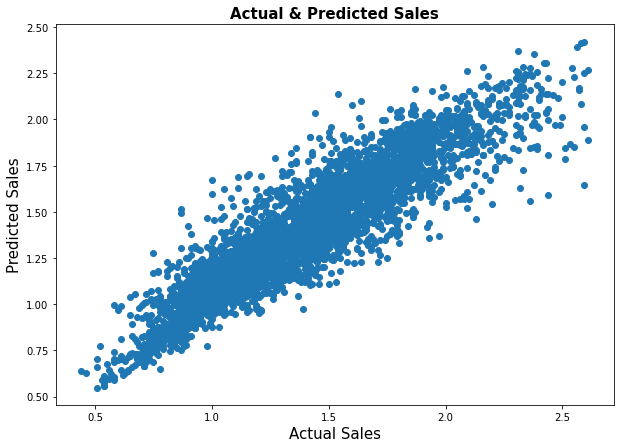

In [284]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales", fontsize= 15)
plt.ylabel("Predicted Sales",fontsize= 15)
plt.title("Actual & Predicted Sales" , fontsize= 15, fontweight= 'bold')
plt.show()

In [285]:
print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

Final R2 Score: 0.8302689743498857

Final Mean absolute error: 0.11806965782914117

Final Mean square error: 0.02577189464763199

Final Root mean square error: 0.16053627206221024


### Best contributing features among all features:

In [288]:
features= ['Total_Volume', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type',
       'region', 'day', 'month']
features

['Total_Volume',
 'Small_Bags',
 'Large_Bags',
 'XLarge_Bags',
 'type',
 'region',
 'day',
 'month']

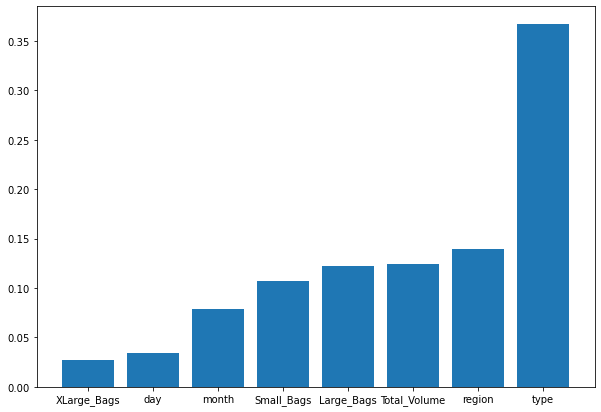

In [295]:
fimp = list(zip(features,grid_rf_best.feature_importances_))
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(10,7))
plt.bar([x[0] for x in fimp],[x[1] for x in fimp])

plt.show()

#### Observations:
The best contributing feature name is 'type' 

### Load and save the model
Now , let's save the model for future use.

In [296]:
import pickle
pickle.dump(grid_rf_best, open("Avocado_Price_model", "wb"))
load_Avocado_Price_model= pickle.load(open("Avocado_Price_model", "rb"))

In [297]:
y_pred = load_Avocado_Price_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

Predicted Values  Actual Values
3367          1.322200           1.11
49            2.082067           2.13
3748          1.187467           1.06
2239          1.454133           1.52
2540          1.165667           1.02
610           1.629933           1.60